# **[Mission] 기초 통계와 데이터 시각화**  
**┗ 건강검진 데이터 시각화하기**
---
> **목차(Context)**

* 데이터 살펴보기
* EDA

In [1]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처 : [공공데이터 포털](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) `국민건강보험공단_건강검진정보`

- 데이터 명세  

| No. | 표준항목명          | 영문명            | 설명                                                                                                           | 표현형식/단위          | 예시         |
|-----|-----------------|------------------|---------------------------------------------------------------------------------------------------------------|---------------------|--------------|
| 1   | 기준년도          | HCHK_YEAR        | 해당 정보의 기준년도를 제공함                                                                                  | YYYY                | 2009         |
| 2   | 가입자일련번호       | IDV_ID           | 해당가입자에 부여한 일련번호                                                                                  | 1 ~ 1,000,000       | 1            |
| 3   | 시도코드          | SIDO             | 해당 수진자 거주지의 시도코드                                                                                  | -                   | 26           |
| 4   | 성별              | SEX              | 해당 정보 대상자의 성별을 제공함                                                                               | 성별 : 1(남자), 2(여자) | 1            |
| 5   | 연령대코드(5세단위)    | AGE_GROUP        | 기준년도에 수진자의 나이를 5세 단위로 그룹화하여 구분한 코드                                                     | 5세 단위 그룹화, 85세 이상은 85+로 그룹화 | -            |
| 6   | 신장(5cm단위)     | HEIGHT           | 검진자의 키(5CM 단위)                                                                                          | N/Cm                | 140          |
| 7   | 체중(5kg단위)     | WEIGHT           | 검진자의 몸무게(5KG 단위)                                                                                      | N/Kg                | 45           |
| 8   | 허리둘레          | WAIST            | 검진자의 허리둘레                                                                                              | N/Cm                | 82           |
| 9   | 시력(좌)          | SIGHT_LEFT       | 수검자의 좌측 눈의 시력                                                                                        | N                   | 0.5          |
| 10  | 시력(우)          | SIGHT_RIGHT      | 수검자의 우측 눈의 시력                                                                                        | N                   | 0.5          |
| 11  | 청력(좌)          | HEAR_LEFT        | 수검자의 좌측 귀의 청력                                                                                        | N                   | 1            |
| 12  | 청력(우)          | HEAR_RIGHT       | 수검자의 우측 귀의 청력                                                                                        | N                   | 1            |
| 13  | 수축기혈압         | BP_HIGH          | 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압                                   | N/mmHg              | 140          |
| 14  | 이완기혈압         | BP_LWST          | 검진자의 최저 혈압으로 심장의 완기시의 혈압                                                                      | N/mmHg              | 81           |
| 15  | 식전혈당(공복혈당)    | BLDS             | 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치                                               | N/mg/dL             | 94           |
| 16  | 총콜레스테롤        | TOT_CHOLE        | 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합                                                               | N/mg/dL             | 164          |
| 17  | 트리글리세라이드    | TRIGLYCERIDE     | 단순지질 혹은 중성지질을 뜻함                                                                                    | N/mg/dL             | 94           |
| 18  | HDL콜레스테롤      | HDL_CHOLE        | HDL(고밀도 리포단백질)에 포함되는 콜레스테롤                                                                      | N/mg/dL             | 45           |
| 19  | LDL콜레스테롤      | LDL_CHOLE        | LDL(저밀도 리포단백질)에 함유된 콜레스테롤                                                                        | N/mg/dL             | 150, 130     |
| 20  | 혈색소            | HMG              | 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행       | N/g/dL              | 15.3984375   |
| 21  | 요단백            | OLIG_PROTE_CD    | 소변에 단백질이 섞여 나오는 것                                                                                  | N                   | 1            |
| 22  | 혈청크레아티닌       | CREATININE       | 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 | N/mg/dL             | 0.8          |
| 23  | 혈청지오티(AST)    | AST              | 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌, 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 | N/IU/L              | 12           |
| 24  | 혈청지피티(ALT)    | ALT              | 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함        | N/U/L               | 15           |
| 25  | 감마지티피         | GAMMA_GTP        | 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함 | N/U/L               | 119, 114     |
| 26  | 흡연상태           | SMK_STAT_TYPE_CD | 해당 수검자의 흡연 상태 여부                                                                                    | N                   | 1            |
| 27  | 음주여부           | DRK_YN           | 해당 수검자의 음주 상태 여부                                                                                    | N/Y                 | 1            |
| 28  | 구강검진수검여부     | HCHK_OE_INSPEC_YN | 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목                                                   | N/Y                 | 1            |
| 29  | 치아우식증유무       | CRS_YN           | 해당 수검자의 치아우식증 유무                                                                                   | N                   | 1            |
| 30  | 치석              | TTR_YN           | 해당 수검자의 치석 여부                                                                                         | N/Y                 | 1            |

     


In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Pandas 보기 옵션
pd.set_option('display.max_columns',100)

### 문제1. 데이터 불러오기
: 제공된 `./국민건강보험공단_건강검진정보_20221231.CSV` 파일을 불러오세요. 한글 폰트가 깨질 경우, 인코딩을 확인해보세요.

In [ ]:
df = pd.read_csv("../data/국민건강보험 데이터.csv", encoding='euc-kr')
df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,1.0,1.0,136.0,81.0,134.0,240.0,108.0,73.0,145.0,12.4,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,NaN,NaN
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,2.0,1.0,119.0,83.0,181.0,205.0,191.0,47.0,120.0,15.7,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,NaN,NaN
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,1.0,1.0,109.0,60.0,91.0,178.0,61.0,54.0,112.0,13.7,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


## **EDA : Data 살펴보기**  
---

* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

### 전체적인 데이터 살펴보기

#### 문제2. 데이터의 형태를 확인해보세요.
- 몇 개의 데이터가 존재하나요?
- 몇 개의 특성이 존재하나요?

In [6]:
# Data 형태 확인
df.shape

(1000000, 30)

#### 문제3. 데이터의 타입을 확인해보세요.
- 어떤 특성들이 데이터에 포함되어 있나요?
- 각 특성의 값은 어떤 데이터 타입으로 구성되어 있나요?

In [7]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   성별           1000000 non-null  int64  
 4   연령대코드(5세단위)  1000000 non-null  int64  
 5   신장(5cm단위)    1000000 non-null  int64  
 6   체중(5kg단위)    1000000 non-null  int64  
 7   허리둘레         999608 non-null   float64
 8   시력(좌)        999814 non-null   float64
 9   시력(우)        999815 non-null   float64
 10  청력(좌)        999885 non-null   float64
 11  청력(우)        999884 non-null   float64
 12  수축기혈압        994444 non-null   float64
 13  이완기혈압        994444 non-null   float64
 14  식전혈당(공복혈당)   994389 non-null   float64
 15  총콜레스테롤       345618 non-null   float64
 16  트리글리세라이드     345614 non-null   float64
 17  HDL콜레스테롤     345614 non-null   float64
 18  LDL

In [8]:
# 데이터 값 확인 - 상위 30행을 출력하여 데이터를 확인해보세요.
df.head(30)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2022,702763,41,2,14,160,75,89.0,1.0,1.0,1.0,1.0,127.0,73.0,84.0,NaN,NaN,NaN,NaN,14.8,1.0,0.8,25.0,20.0,15.0,1.0,0.0,0,NaN,NaN
1,2022,765435,41,2,9,150,45,68.0,1.0,1.0,1.0,1.0,127.0,75.0,85.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,19.0,10.0,7.0,1.0,1.0,0,NaN,NaN
2,2022,343621,41,2,13,150,60,78.8,1.0,1.0,1.0,1.0,135.0,81.0,105.0,NaN,NaN,NaN,NaN,13.0,1.0,0.8,17.0,15.0,15.0,1.0,1.0,0,NaN,NaN
3,2022,3393534,41,2,6,160,50,69.0,1.0,1.0,1.0,1.0,109.0,70.0,81.0,NaN,NaN,NaN,NaN,13.4,1.0,0.8,25.0,16.0,13.0,1.0,1.0,0,NaN,NaN
4,2022,1716951,41,2,7,160,55,75.0,1.0,1.0,1.0,1.0,110.0,67.0,79.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,22.0,22.0,15.0,1.0,1.0,0,NaN,NaN
5,2022,4207013,41,1,7,170,85,93.5,1.0,1.0,1.0,1.0,136.0,89.0,92.0,NaN,NaN,NaN,NaN,15.8,1.0,0.8,19.0,31.0,29.0,1.0,1.0,0,NaN,NaN
6,2022,1773908,41,2,5,160,40,57.0,1.0,1.0,1.0,1.0,100.0,60.0,85.0,NaN,NaN,NaN,NaN,11.9,1.0,0.8,23.0,10.0,10.0,1.0,1.0,0,NaN,NaN
7,2022,4265572,41,1,7,180,65,74.8,1.0,1.0,1.0,1.0,110.0,80.0,94.0,NaN,NaN,NaN,NaN,16.5,1.0,0.8,13.0,10.0,19.0,1.0,1.0,0,NaN,NaN
8,2022,2303478,41,2,6,155,50,66.0,1.0,1.0,1.0,1.0,102.0,70.0,108.0,NaN,NaN,NaN,NaN,13.1,1.0,0.8,9.0,7.0,20.0,1.0,1.0,0,NaN,NaN
9,2022,4099406,41,2,6,165,55,68.0,1.0,1.0,1.0,1.0,120.0,80.0,85.0,NaN,NaN,NaN,NaN,15.4,1.0,0.8,32.0,33.0,20.0,1.0,1.0,0,NaN,NaN


#### 문제4 : 결측치 확인하기
- 각 특성 별로 결측치 개수와 비율을 확인해보세요.
- 결측치의 양상이 특성마다 차이가 난다면, 왜 그런 차이가 발생했을까요?

In [9]:
# 각 열에 있는 결측치의 수와 결측치의 비율을 계산해보세요.
df.isna().sum()
df.isna().mean() * 100

기준년도            0.0000
가입자일련번호         0.0000
시도코드            0.0000
성별              0.0000
연령대코드(5세단위)     0.0000
신장(5cm단위)       0.0000
체중(5kg단위)       0.0000
허리둘레            0.0392
시력(좌)           0.0186
시력(우)           0.0185
청력(좌)           0.0115
청력(우)           0.0116
수축기혈압           0.5556
이완기혈압           0.5556
식전혈당(공복혈당)      0.5611
총콜레스테롤         65.4382
트리글리세라이드       65.4386
HDL콜레스테롤       65.4386
LDL콜레스테롤       66.0926
혈색소             0.5616
요단백             1.1054
혈청크레아티닌         0.5615
혈청지오티(AST)      0.5613
혈청지피티(ALT)      0.5613
감마지티피           0.5611
흡연상태            0.0096
음주여부            0.0073
구강검진수검여부        0.0000
치아우식증유무        65.5671
치석             65.5670
dtype: float64

#### 문제5 : 결측치 시각화하기
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.
- 결측치가 있는 부분을 적절한 방법으로 제거해보세요.
- 동일한 방법으로 시각화를 다시 진행하여 정말 제거가 되었는지 시각적으로 확인해봅시다.
- 한글이 깨지는 경우 아래 코드를 실행해주세요.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

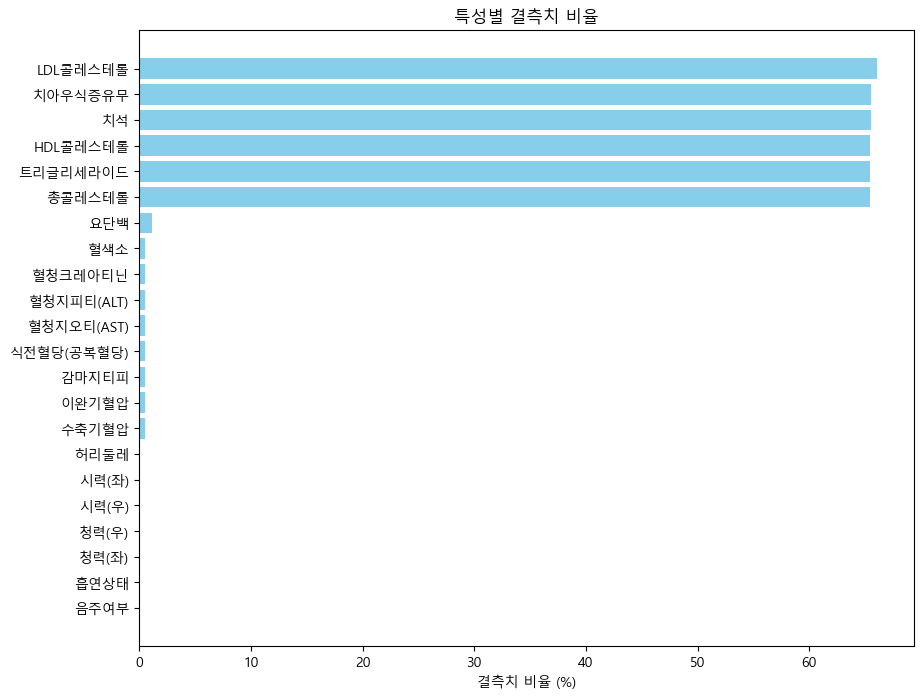

In [11]:
# 결측치가 존재하는 부분을 시각화 해보세요.
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

plt.figure(figsize=(10, 8))
plt.barh(missing_data.index, missing_data, color='skyblue')
plt.xlabel("결측치 비율 (%)")
plt.title("특성별 결측치 비율")
plt.show()

In [12]:
df = df.dropna(subset=['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'])

df['치석'] = df['치석'].fillna(df['치석'].mode()[0])
df['치아우식증유무'] = df['치아우식증유무'].fillna(df['치아우식증유무'].mode()[0])

print(df[['치석', '치아우식증유무']].isnull().sum())
df

치석         0
치아우식증유무    0
dtype: int64


,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0
654337,2022,3506109,11,1,9,175,70,80.0,1.2,1.0,1.0,1.0,128.0,80.0,102.0,241.0,139.0,50.0,163.0,15.6,1.0,0.9,22.0,22.0,23.0,1.0,1.0,0,0.0,1.0
654338,2022,2560656,47,1,17,160,55,80.0,0.7,9.9,1.0,1.0,132.0,72.0,110.0,218.0,108.0,42.0,154.0,11.1,1.0,1.0,22.0,15.0,17.0,2.0,0.0,0,0.0,1.0
654339,2022,6768,41,2,9,155,70,80.0,0.6,0.8,1.0,1.0,169.0,107.0,91.0,209.0,140.0,78.0,103.0,14.0,1.0,0.6,21.0,12.0,29.0,1.0,1.0,0,0.0,1.0
654340,2022,3874856,27,1,13,165,60,80.0,1.2,0.8,1.0,1.0,115.0,66.0,104.0,157.0,72.0,73.0,70.0,14.2,1.0,0.9,22.0,19.0,20.0,2.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,1.0,1.0,136.0,81.0,134.0,240.0,108.0,73.0,145.0,12.4,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,0.0,1.0
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,2.0,1.0,119.0,83.0,181.0,205.0,191.0,47.0,120.0,15.7,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,0.0,1.0
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,1.0,1.0,109.0,60.0,91.0,178.0,61.0,54.0,112.0,13.7,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


In [13]:
df.dropna()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
654336,2022,3955070,11,1,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,2.0,1.0,1,0.0,0.0
654337,2022,3506109,11,1,9,175,70,80.0,1.2,1.0,1.0,1.0,128.0,80.0,102.0,241.0,139.0,50.0,163.0,15.6,1.0,0.9,22.0,22.0,23.0,1.0,1.0,0,0.0,1.0
654338,2022,2560656,47,1,17,160,55,80.0,0.7,9.9,1.0,1.0,132.0,72.0,110.0,218.0,108.0,42.0,154.0,11.1,1.0,1.0,22.0,15.0,17.0,2.0,0.0,0,0.0,1.0
654339,2022,6768,41,2,9,155,70,80.0,0.6,0.8,1.0,1.0,169.0,107.0,91.0,209.0,140.0,78.0,103.0,14.0,1.0,0.6,21.0,12.0,29.0,1.0,1.0,0,0.0,1.0
654340,2022,3874856,27,1,13,165,60,80.0,1.2,0.8,1.0,1.0,115.0,66.0,104.0,157.0,72.0,73.0,70.0,14.2,1.0,0.9,22.0,19.0,20.0,2.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2134210,43,1,6,170,90,98.8,1.2,1.2,1.0,1.0,128.0,84.0,88.0,245.0,150.0,35.0,180.0,15.8,1.0,0.9,95.0,251.0,77.0,1.0,1.0,1,0.0,0.0
999996,2022,1686113,27,2,15,150,85,116.0,0.6,0.7,1.0,1.0,136.0,81.0,134.0,240.0,108.0,73.0,145.0,12.4,1.0,1.4,59.0,49.0,25.0,1.0,0.0,0,0.0,1.0
999997,2022,902951,45,1,12,165,80,98.2,0.9,1.0,2.0,1.0,119.0,83.0,181.0,205.0,191.0,47.0,120.0,15.7,1.0,1.0,48.0,82.0,60.0,2.0,1.0,0,0.0,1.0
999998,2022,3721315,47,1,6,175,65,75.4,1.2,1.2,1.0,1.0,109.0,60.0,91.0,178.0,61.0,54.0,112.0,13.7,1.0,1.1,245.0,72.0,17.0,2.0,1.0,1,1.0,0.0


In [14]:
# 전처리 이후 전과 후가 어떻게 달라졌는지 확인해봅시다.


#### 문제6 : 중복값 확인하기
- 데이터에 중복값이 있는 지 확인해보세요. 만약 있다면, 제거하세요.

In [15]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

In [16]:
data_cleaned = df.drop_duplicates()

#### 문제7 : 실제값 매핑하여 컬럼 수정하기
- 현재 데이터는 연령대를 코드로 제공하고 있습니다. 연령대 코드가 의미하는 바는 다음 표와 같습니다.
- `연령대`라는 새로운 열을 만들고, 연령대 코드를 의미하는 연령대로 매핑해보세요.

In [17]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [18]:
# 연령대 코드를 새로운 매핑으로 업데이트 해보세요
df['연령대'] = df['연령대코드(5세단위)'].map(age_group_mapping)

In [19]:
print(df[['연령대코드(5세단위)', '연령대']].head())

        연령대코드(5세단위)    연령대
654336           13  60-64
654337            9  40-44
654338           17  80-84
654339            9  40-44
654340           13  60-64


- 시도코드도 유사한 방식으로 맵핑해보세요. `시도`로 새로운 컬럼을 생성하시면 됩니다.
- 시도코드에 대한 힌트는 [행정표준코드관리시스템](https://www.code.go.kr/stdcode/regCodeL.do)에서 얻으실 수 있습니다.

In [20]:
# 시도코드 열의 고유값 확인 17개
print(sorted(df['시도코드'].unique()))

[np.int64(11), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(36), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49)]


In [21]:
# 시도 코드 매핑
sido_mapping = {
    11: '서울',
    26: '부산',
    27: '대구',
    28: '인천',
    29: '광주',
    30: '대전',
    31: '울산',
    36: '세종',
    41: '경기도',
    42: '강원도',
    43: '충청북도',
    44: '충청남도',
    45: '전라북도',
    46: '전라남도',
    47: '경상북도',
    48: '경상남도',
    49: '제주도',
}


In [22]:
# 시도 코드를 새로운 매핑으로 업데이트 해보세요
df['시도'] = df['시도코드'].map(sido_mapping)

print(df[['시도코드', '시도']].head())

        시도코드    시도
654336    11    서울
654337    11    서울
654338    47  경상북도
654339    41   경기도
654340    27    대구


- 나머지 컬럼들은 건강보험공단에서 제공하는 코드북 바탕으로 매핑해보겠습니다.

In [23]:
print(df['성별'].unique())

gender = {
    1 : '남자',
    2 : '여자'
}

df['성별'] = df['성별'].fillna(1)  
df['성별'] = df['성별'].map(gender)  

print(df[['성별']].head())

[1 2]
        성별
654336  남자
654337  남자
654338  남자
654339  여자
654340  남자


In [24]:
# 흡연상태에 대한 매핑 작업
print(df['흡연상태'].unique())

smoking = {
    1 : '피우지 않는다',
    2 : '이전에 피웠으나 끊었다',
    3 : '현재도 피우고 있다'
}

df['흡연상태'] = df['흡연상태'].fillna(1)
df['흡연상태'] = df['흡연상태'].map(smoking) 

print(df[['흡연상태']].head())

[ 2.  1.  3. nan]
                흡연상태
654336  이전에 피웠으나 끊었다
654337       피우지 않는다
654338  이전에 피웠으나 끊었다
654339       피우지 않는다
654340  이전에 피웠으나 끊었다


In [25]:
# 음주 여부에 대한 매핑 작업
drinking = {
    0 : '마시지 않는다',
    1 : '마신다'
}

df['음주여부'] = df['음주여부'].fillna(0) 
df['음주여부'] = df['음주여부'].map(drinking) 

print(df[['음주여부']].head())

           음주여부
654336      마신다
654337      마신다
654338  마시지 않는다
654339      마신다
654340      마신다


In [26]:
# 구강검진수검여부에 대한 매핑 작업
teeth = {
    0 : '미수검',
    1 : '수검'
}

df['구강검진수검여부'] = df['구강검진수검여부'].fillna(0)  
df['구강검진수검여부'] = df['구강검진수검여부'].map(teeth) 

print(df[['구강검진수검여부']].head())

       구강검진수검여부
654336       수검
654337      미수검
654338      미수검
654339      미수검
654340      미수검


In [27]:
df.head(3)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대,시도
654336,2022,3955070,11,남자,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,이전에 피웠으나 끊었다,마신다,수검,0.0,0.0,60-64,서울
654337,2022,3506109,11,남자,9,175,70,80.0,1.2,1.0,1.0,1.0,128.0,80.0,102.0,241.0,139.0,50.0,163.0,15.6,1.0,0.9,22.0,22.0,23.0,피우지 않는다,마신다,미수검,0.0,1.0,40-44,서울
654338,2022,2560656,47,남자,17,160,55,80.0,0.7,9.9,1.0,1.0,132.0,72.0,110.0,218.0,108.0,42.0,154.0,11.1,1.0,1.0,22.0,15.0,17.0,이전에 피웠으나 끊었다,마시지 않는다,미수검,0.0,1.0,80-84,경상북도


In [28]:
# 기존 인덱스를 제거하고 새로운 인덱스를 생성
df = df.reset_index(drop=True)
df.head(3)

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,연령대,시도
0,2022,3955070,11,남자,13,165,60,80.0,0.8,0.9,1.0,1.0,118.0,68.0,103.0,243.0,120.0,85.0,134.0,14.0,1.0,1.0,22.0,17.0,34.0,이전에 피웠으나 끊었다,마신다,수검,0.0,0.0,60-64,서울
1,2022,3506109,11,남자,9,175,70,80.0,1.2,1.0,1.0,1.0,128.0,80.0,102.0,241.0,139.0,50.0,163.0,15.6,1.0,0.9,22.0,22.0,23.0,피우지 않는다,마신다,미수검,0.0,1.0,40-44,서울
2,2022,2560656,47,남자,17,160,55,80.0,0.7,9.9,1.0,1.0,132.0,72.0,110.0,218.0,108.0,42.0,154.0,11.1,1.0,1.0,22.0,15.0,17.0,이전에 피웠으나 끊었다,마시지 않는다,미수검,0.0,1.0,80-84,경상북도


#### 문제8 : 이상치 탐지하기
- 사분위수를 이용하여 이상치를 탐지해봅시다.
- 데이터프레임과 이상치 삭제 대상 컬럼을 패러미터로 받고, 각 컬럼 별 이상치를 삭제한 이후의 데이터 프레임을 반환하는 함수를 작성해보세요.

In [29]:
# 이상치 탐지 및 삭제를 위해 기존 데이터 백업
new_df = df.copy()
new_df.shape

(339074, 32)

In [30]:
# 각 열에 대해 이상치 데이터가 삭제된 새로운 데이터 프레임을 반환하는 함수 작성
cols = []

def remove_out(dataframe, remove_col):
  #함수를 작성하세요.
  pass

new2_df = remove_out(new_df, cols)

In [31]:
def remove_outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [32]:
# 모든 수치형 컬럼에서 이상치 삭제
df = remove_outliers(df)
df.shape

(158548, 32)

In [33]:
# 함수 실행 및 이상치 제거 전/후 데이터프레임 크기 비교

### 개별 데이터 살펴보기

#### 문제9 : 수치형 데이터와 범주형 데이터 구분하기
- 수치형 데이터와 범주형 데이터는 데이터를 살펴보는데 차이가 있습니다. 수치형 데이터와 범주형 데이터를 구분하세요.

In [34]:
# 범주형 데이터
# 범주형 데이터
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['성별', '흡연상태', '음주여부', '구강검진수검여부', '연령대', '시도'], dtype='object')


In [35]:
# 수치형 데이터
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['기준년도', '가입자일련번호', '시도코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '치아우식증유무', '치석'],
      dtype='object')


#### 문제10 : 기술통계량 확인하기
- 수치형 데이터와 범주형 데이터의 기술통계량을 확인해보세요.

In [36]:
# 수치형 변수의 기술 통계량
numeric_stats = df[numeric_columns].describe()
print(numeric_stats)

           기준년도       가입자일련번호           시도코드    연령대코드(5세단위)      신장(5cm단위)  \
count  158548.0  1.585480e+05  158548.000000  158548.000000  158548.000000   
mean     2022.0  2.498896e+06      33.677177      11.279575     161.548175   
std         0.0  1.444657e+06      12.737281       2.747779       9.502877   
min      2022.0  5.800000e+01      11.000000       5.000000     135.000000   
25%      2022.0  1.245041e+06      27.000000       9.000000     155.000000   
50%      2022.0  2.497576e+06      41.000000      11.000000     160.000000   
75%      2022.0  3.751463e+06      43.000000      13.000000     170.000000   
max      2022.0  4.999990e+06      49.000000      18.000000     190.000000   

           체중(5kg단위)           허리둘레          시력(좌)          시력(우)     청력(좌)  \
count  158548.000000  158548.000000  158548.000000  158548.000000  158548.0   
mean       62.144587      80.254056       0.907678       0.908208       1.0   
std        11.923485       9.194188       0.320178       0.3

In [37]:
# 각 변수들은 어떤 특징을 가지고 있나요?

In [38]:
# 범주형 변수의 기술 통계량
categorical_stats = df[categorical_columns].describe()
print(categorical_stats)

            성별     흡연상태    음주여부 구강검진수검여부     연령대      시도
count   158548   158548  158548   158548  158548  158548
unique       2        3       2        2      14      17
top         여자  피우지 않는다     마신다      미수검   60-64     경기도
freq     83689   108815   93119   133409   30769   43611


In [39]:
# 각 변수들은 어떤 특징을 가지고 있나요?

#### 문제11 : 분포 확인하기
- 각 데이터가 어떻게 분포되어 있는지 확인해보세요.
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지, 아니라면 그 이유가 무엇인지 확인해보세요.

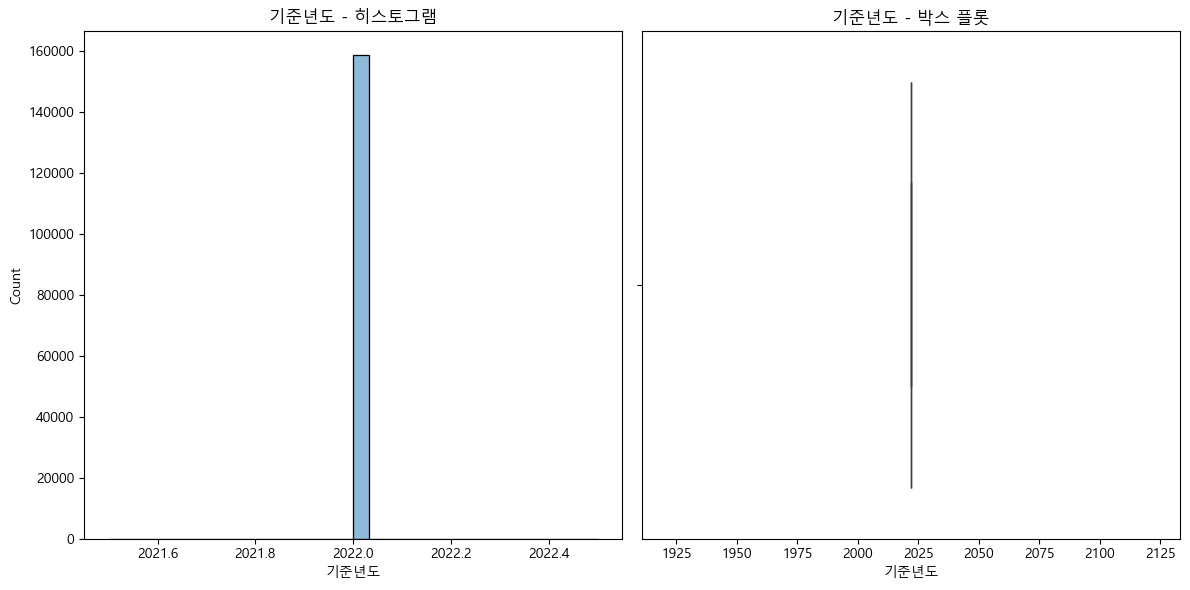

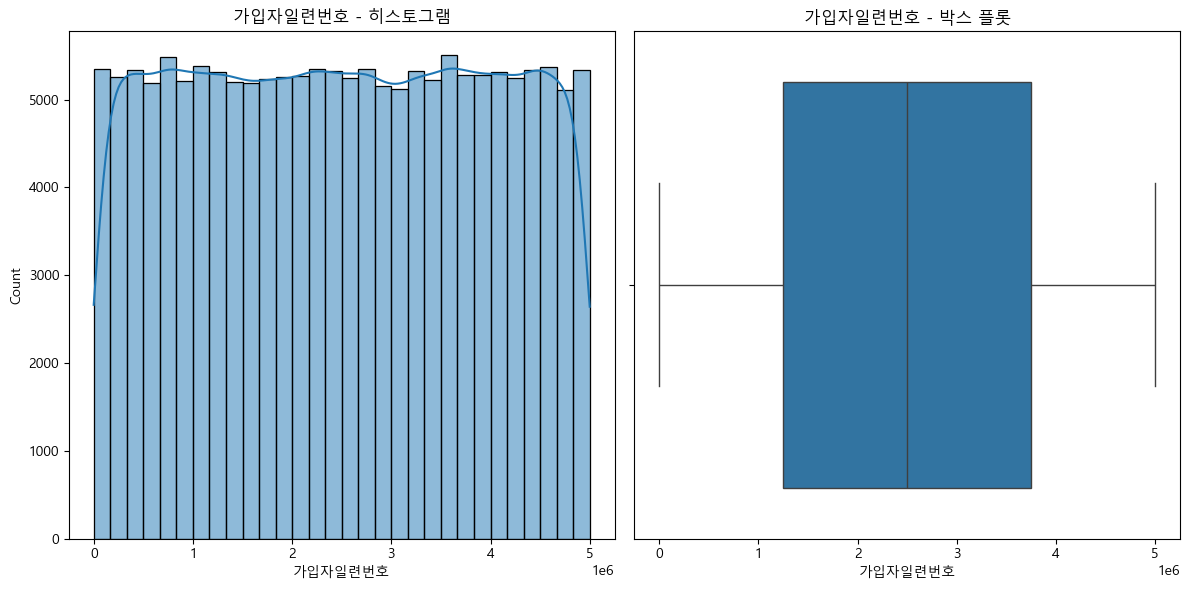

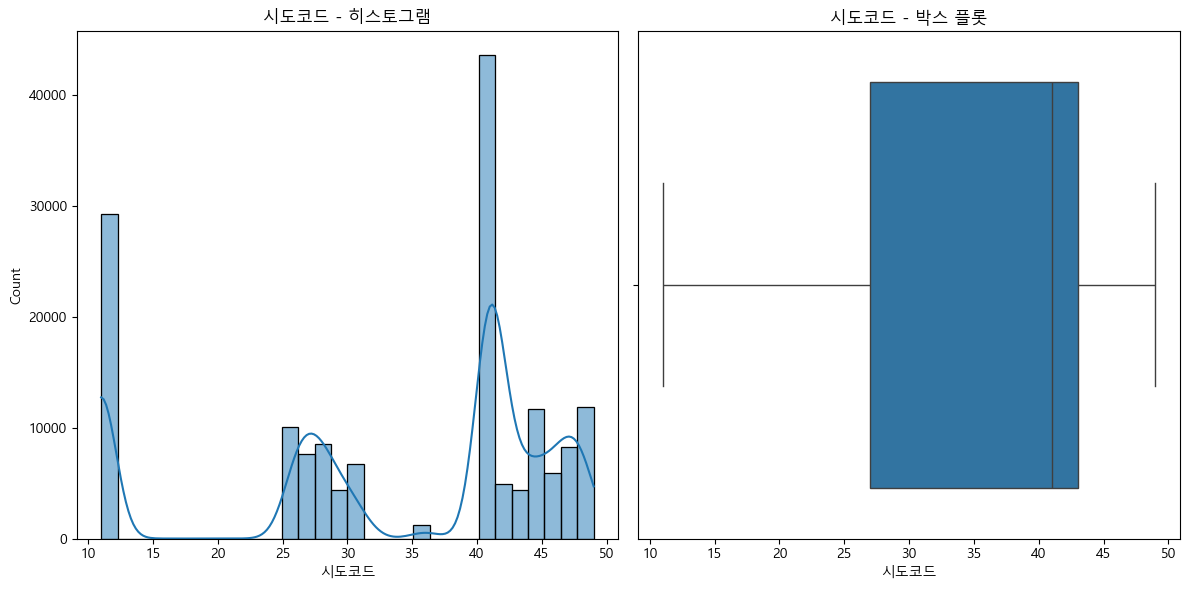

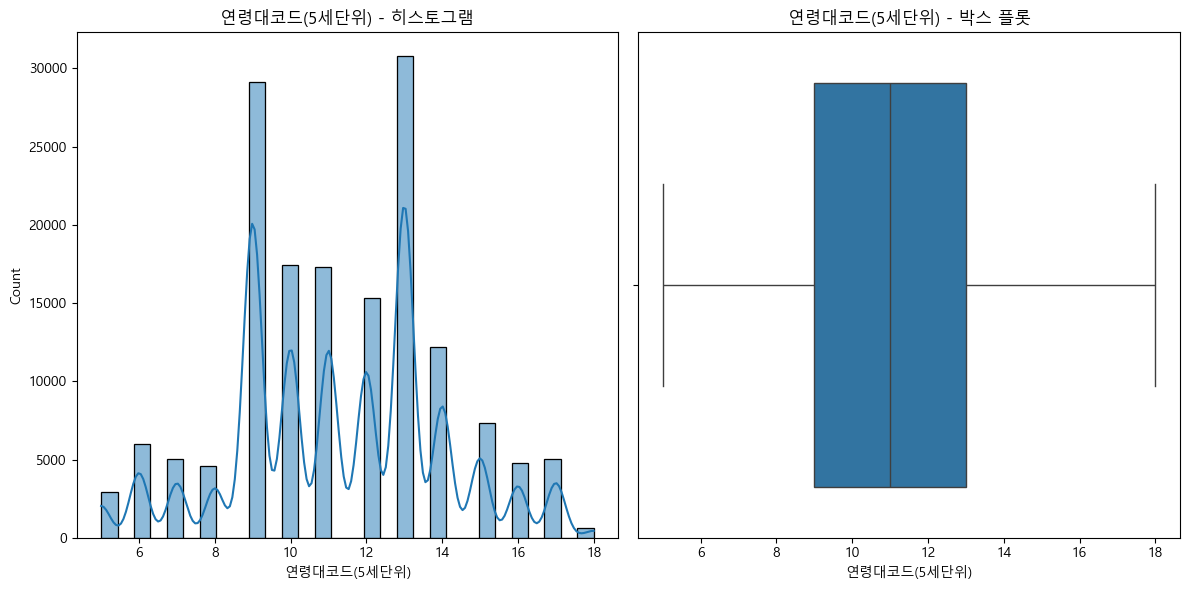

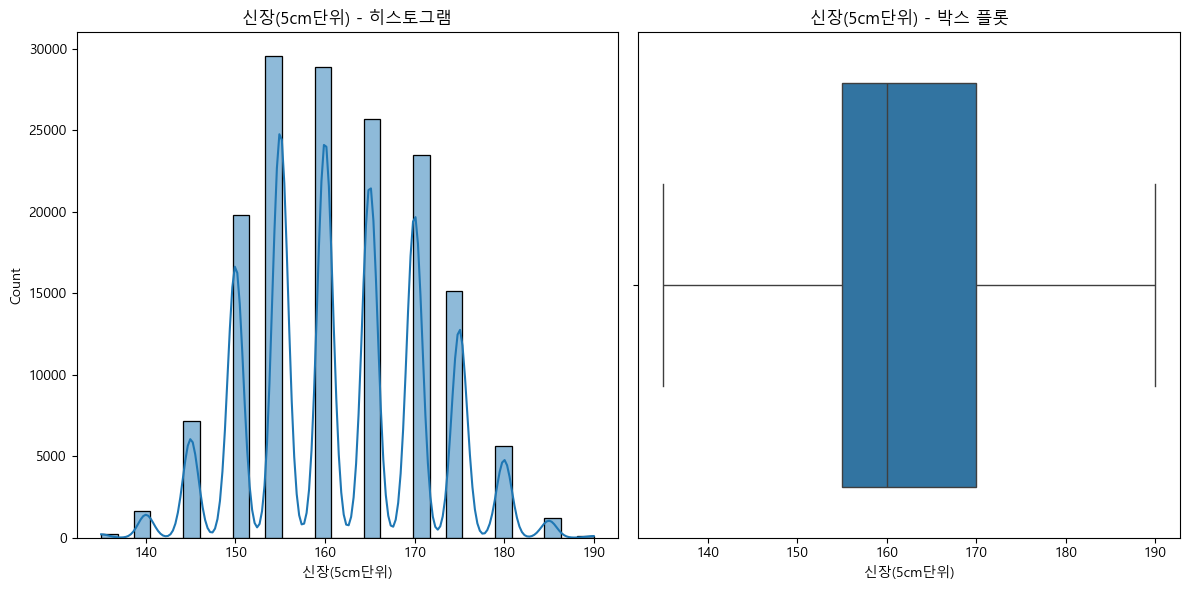

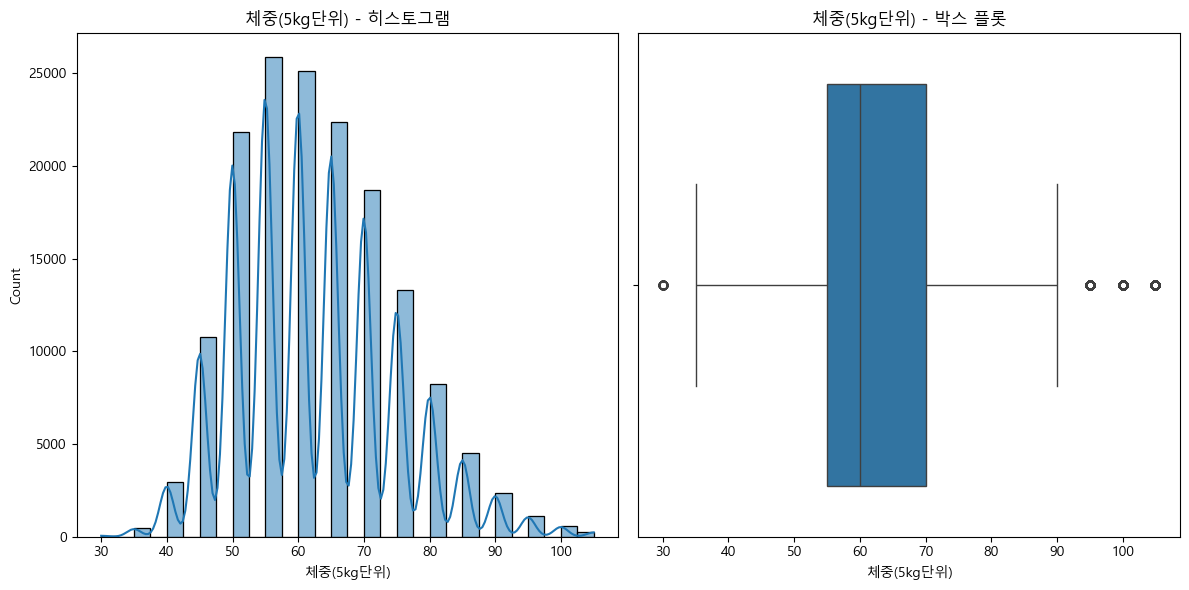

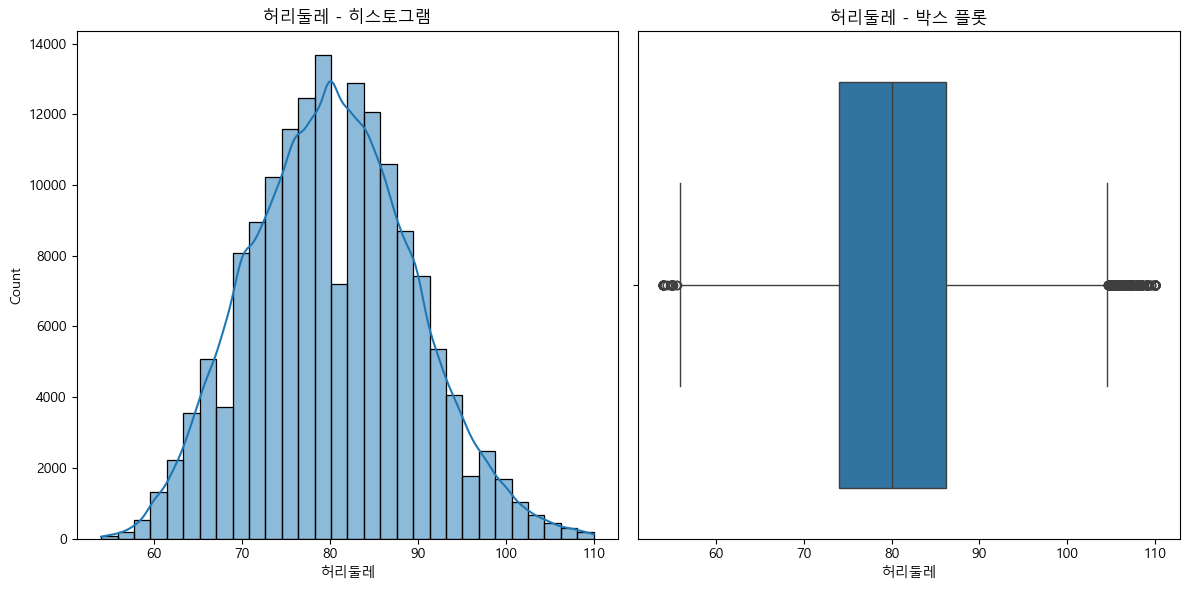

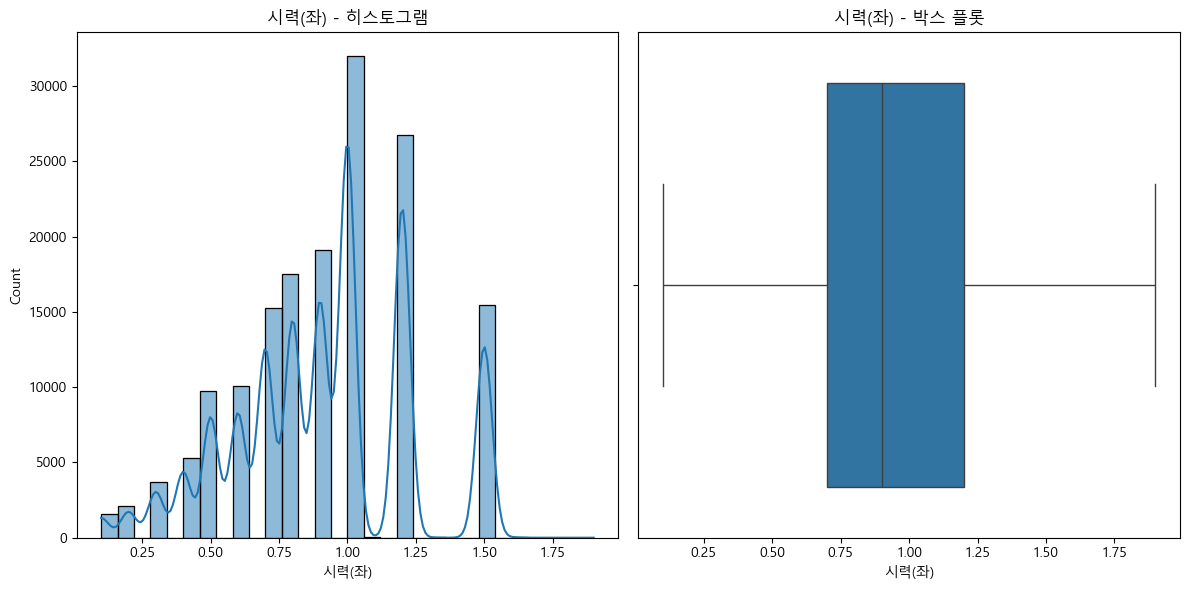

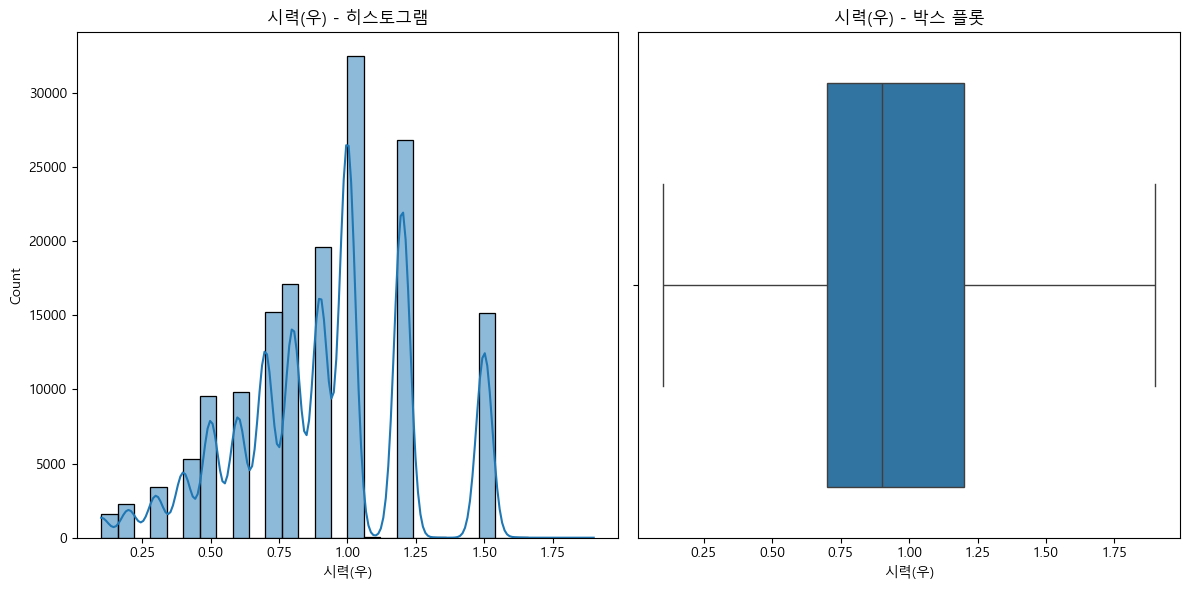

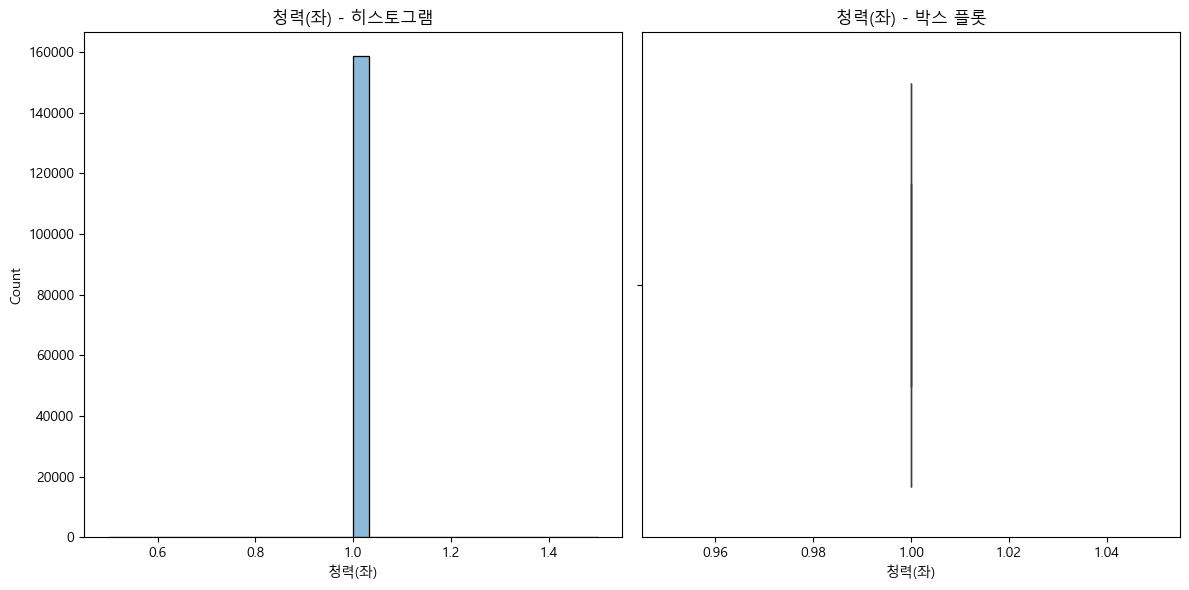

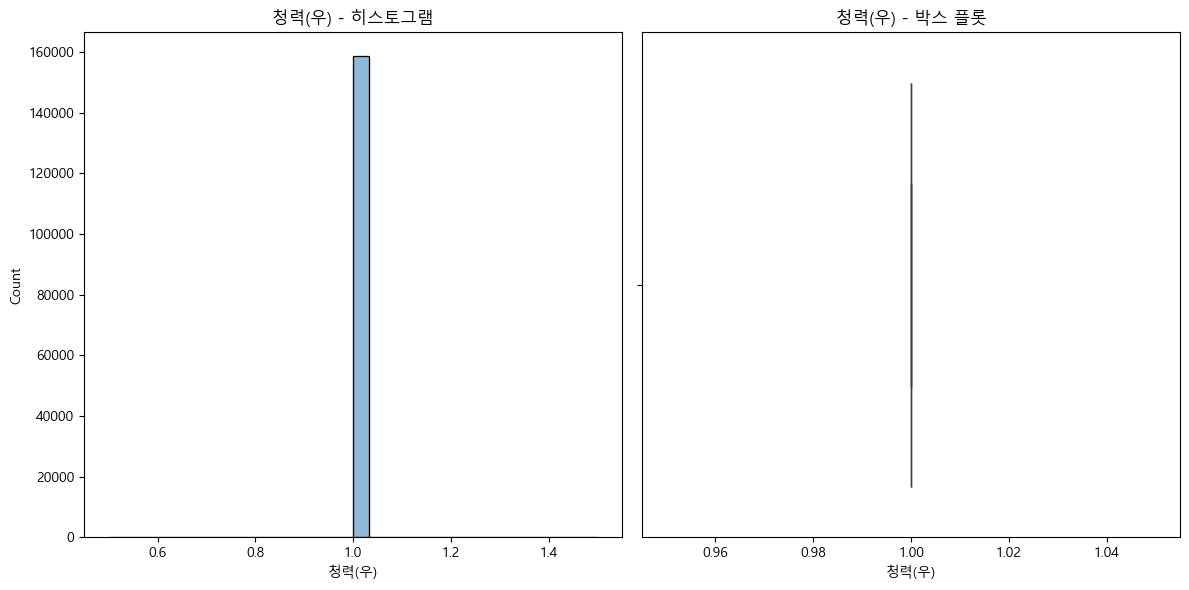

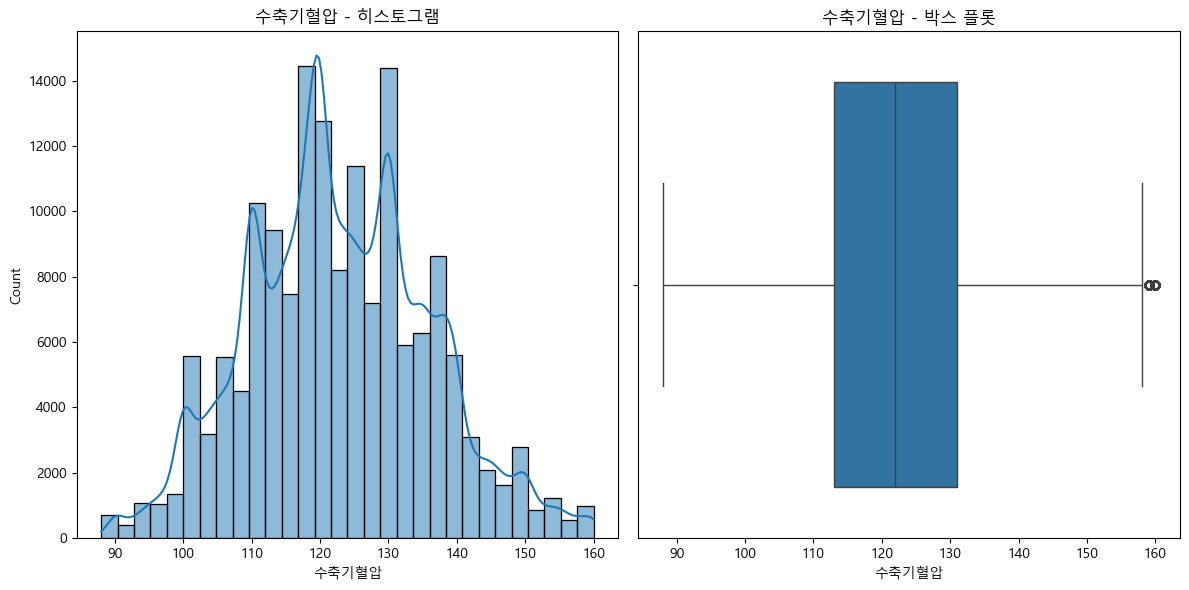

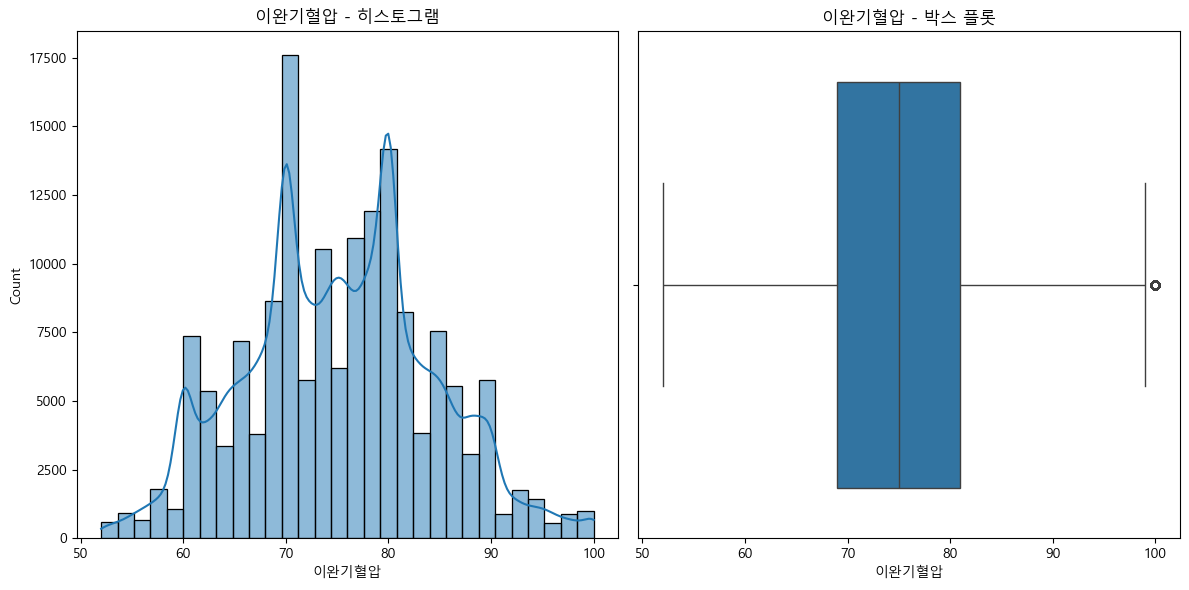

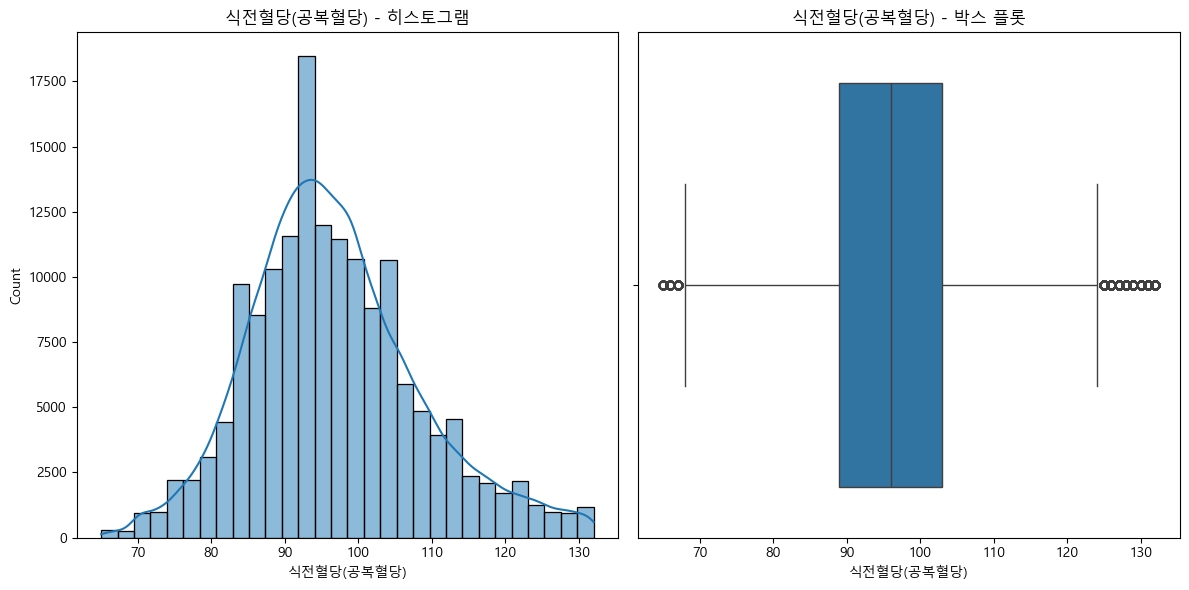

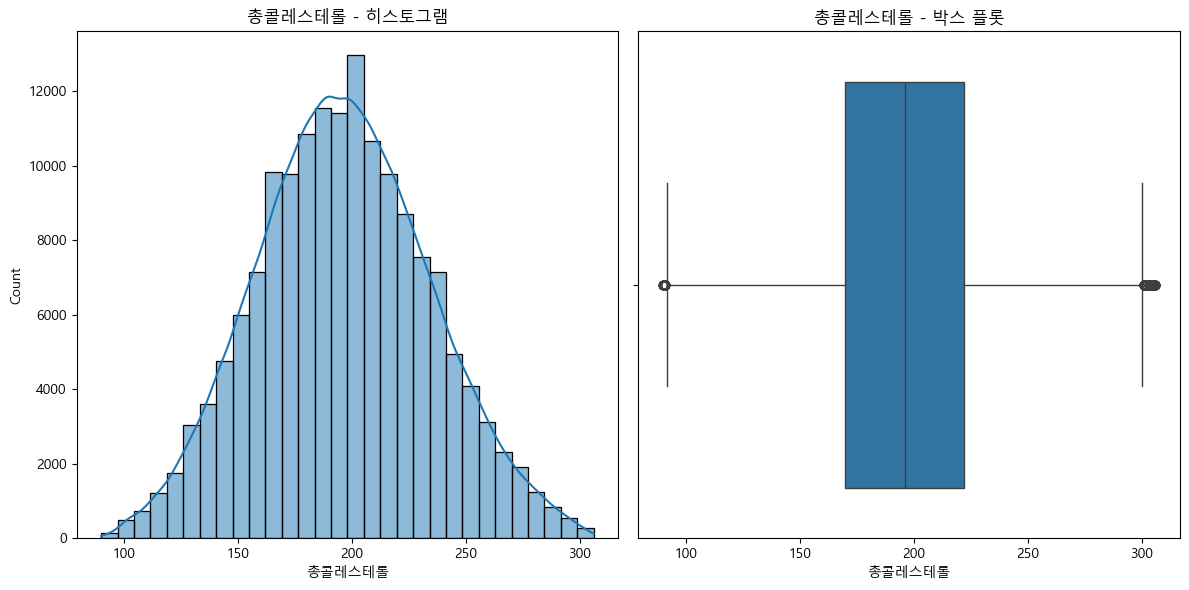

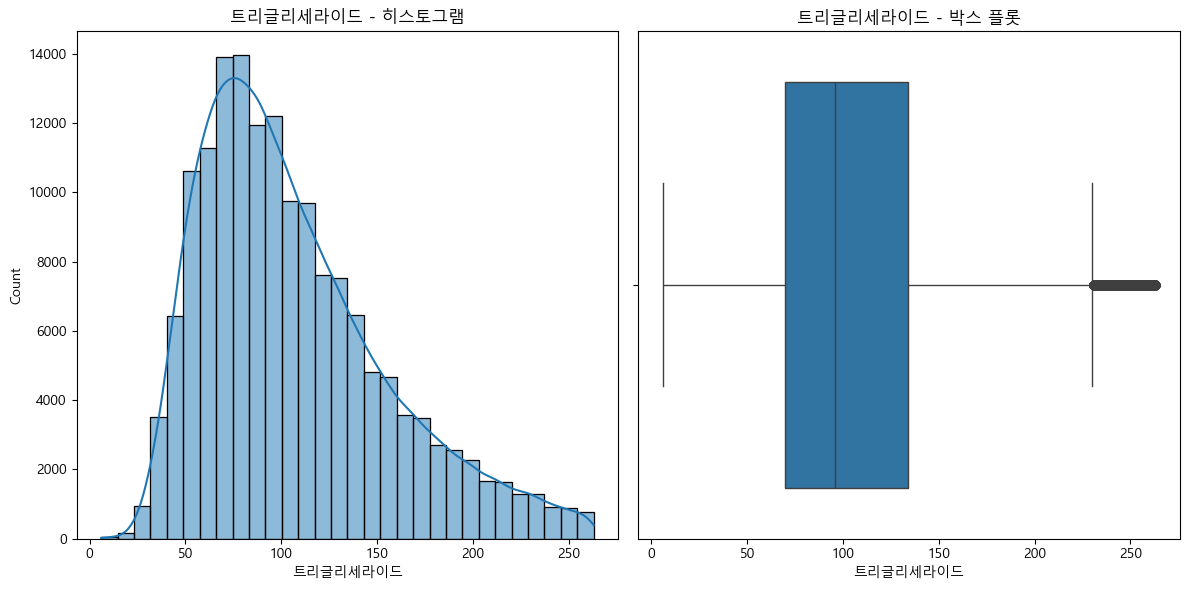

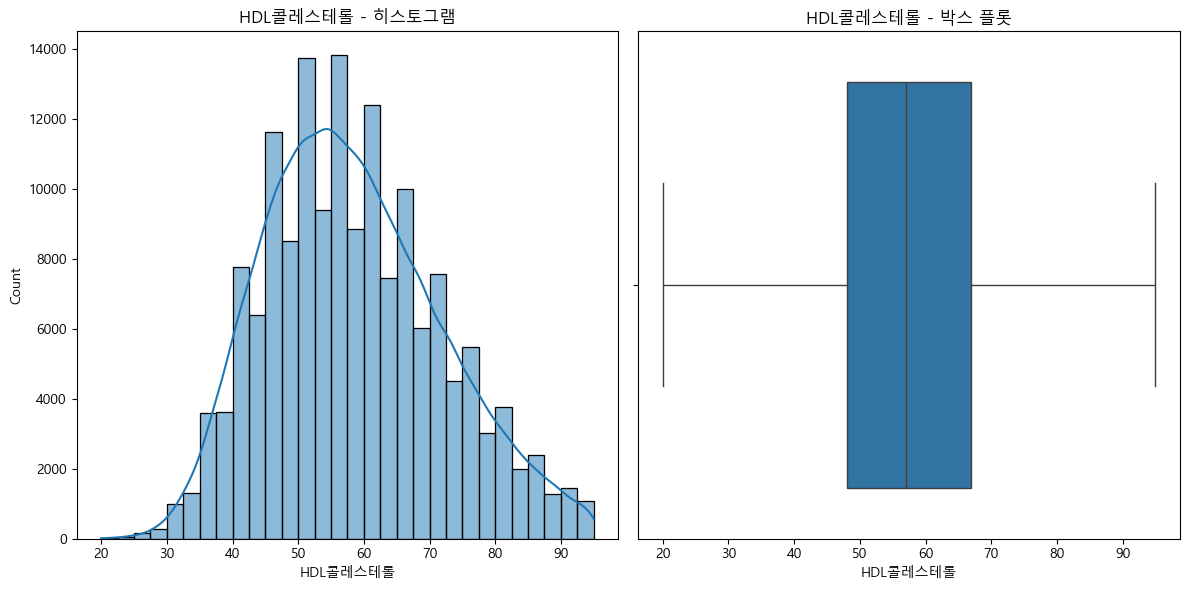

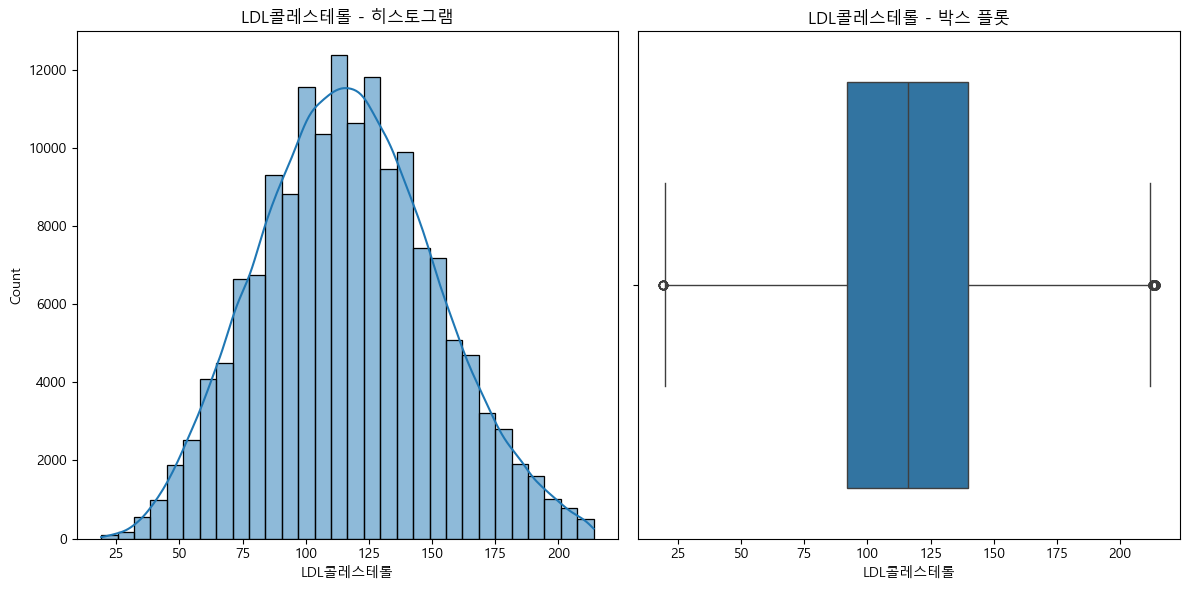

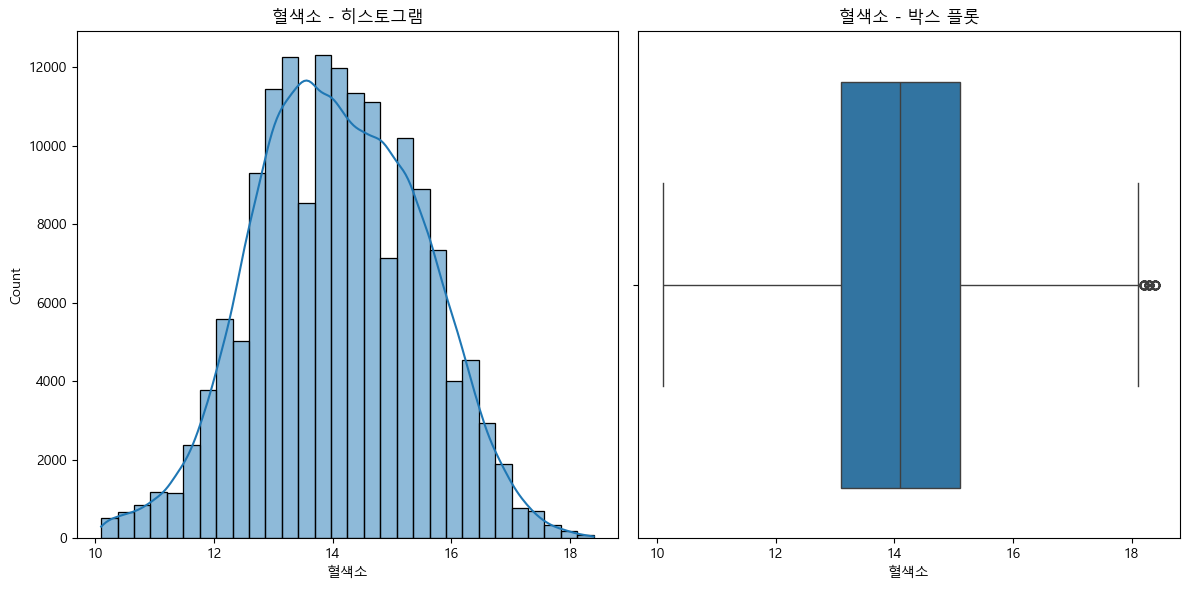

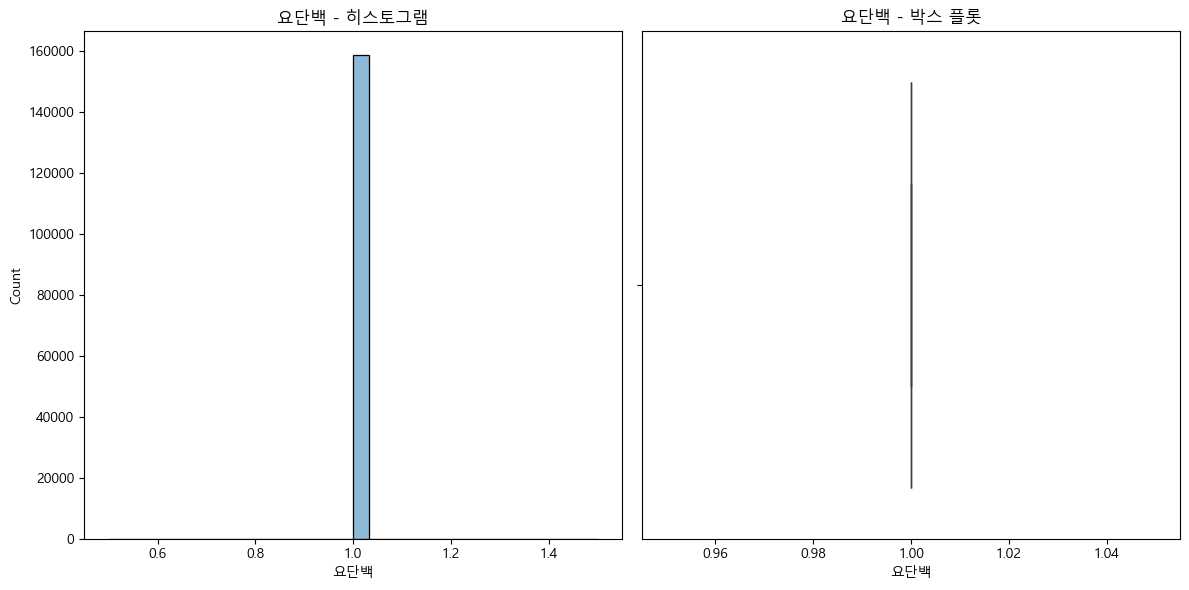

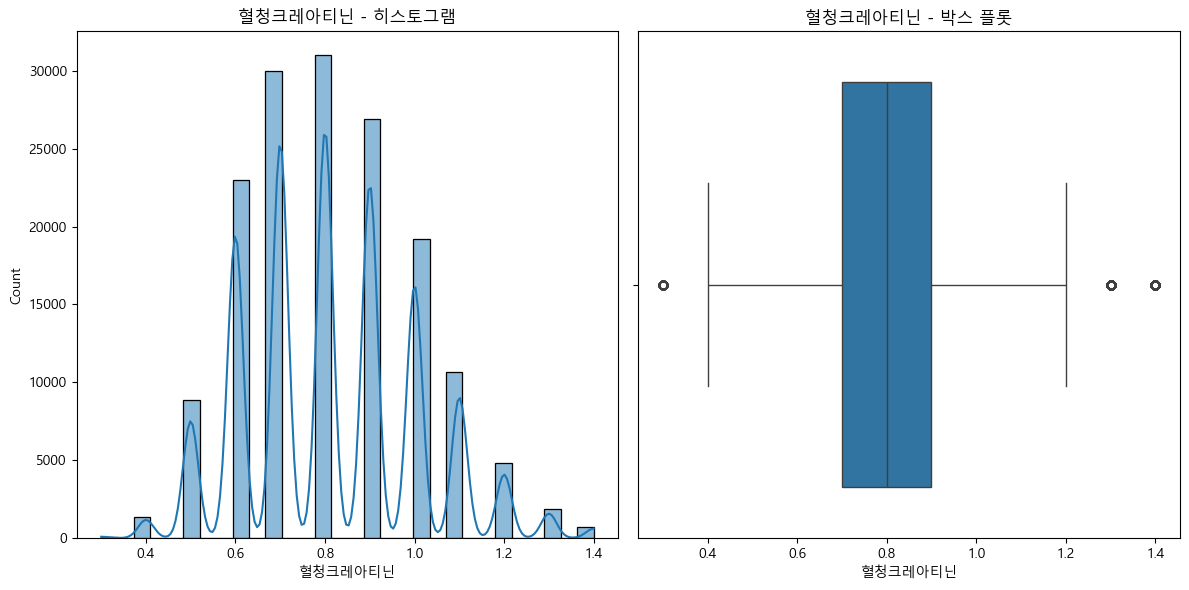

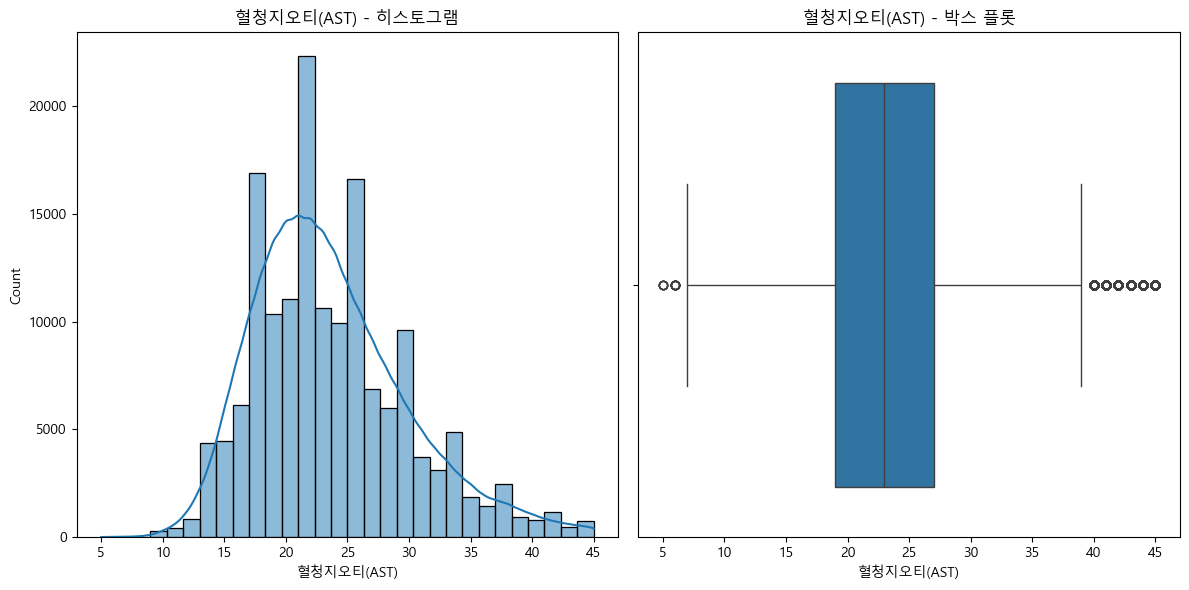

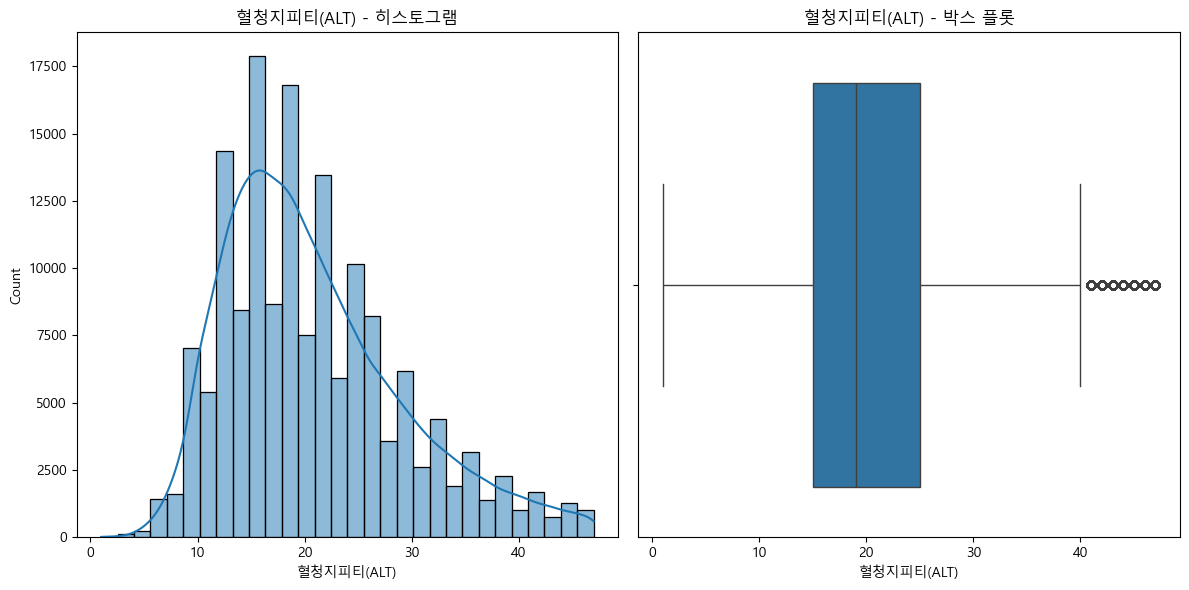

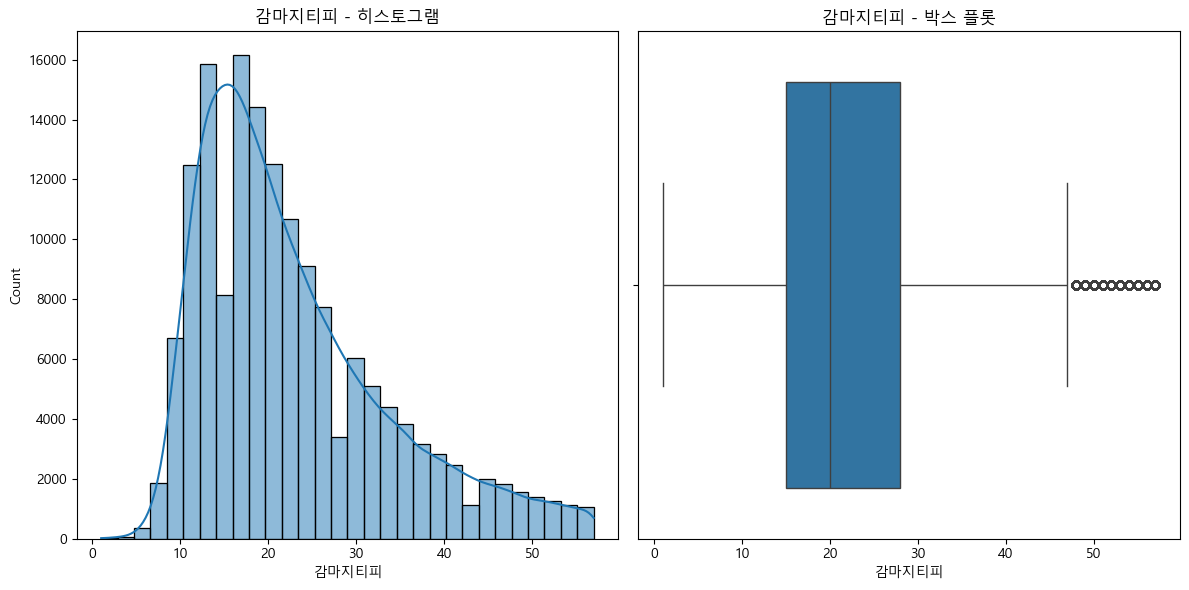

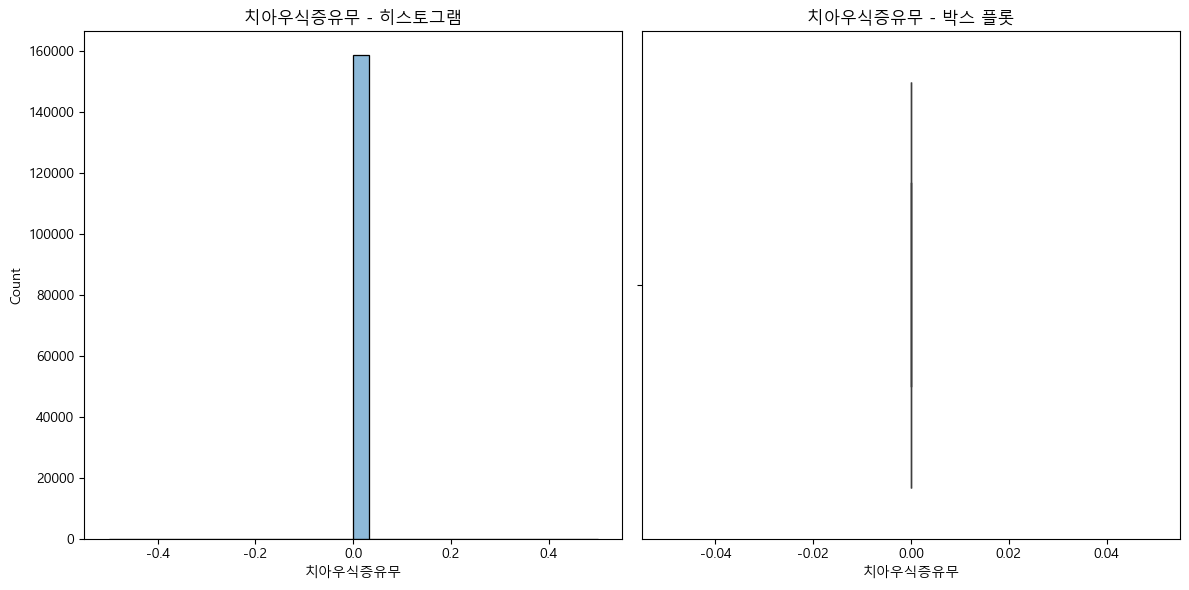

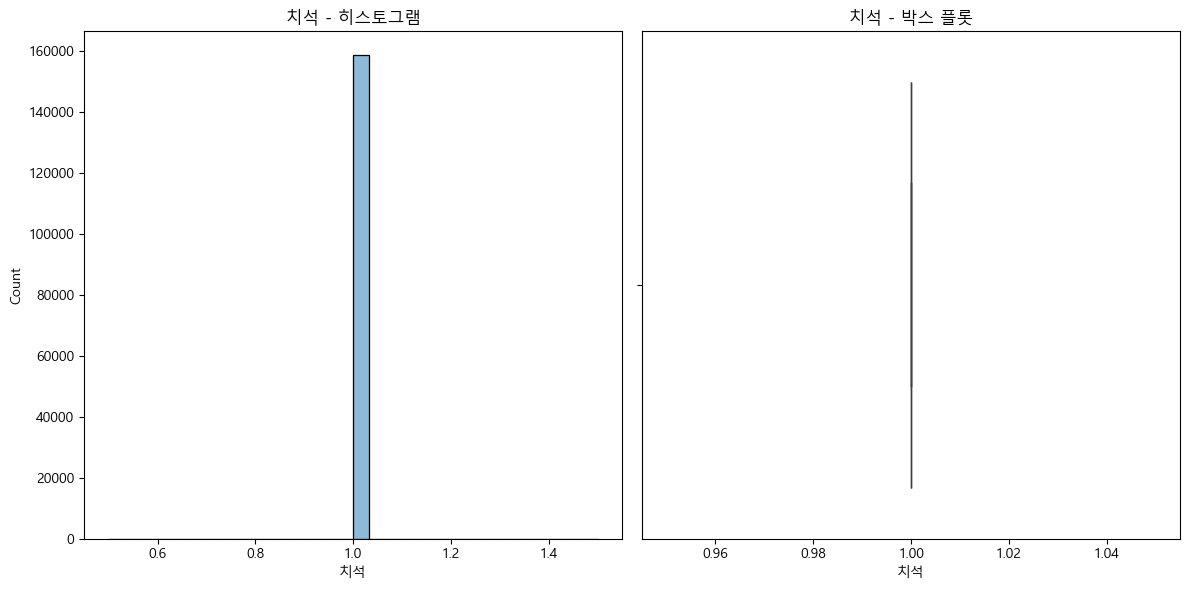

In [40]:
#수치형 데이터

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'{column} - 히스토그램')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'{column} - 박스 플롯')

    plt.tight_layout()
    plt.show()

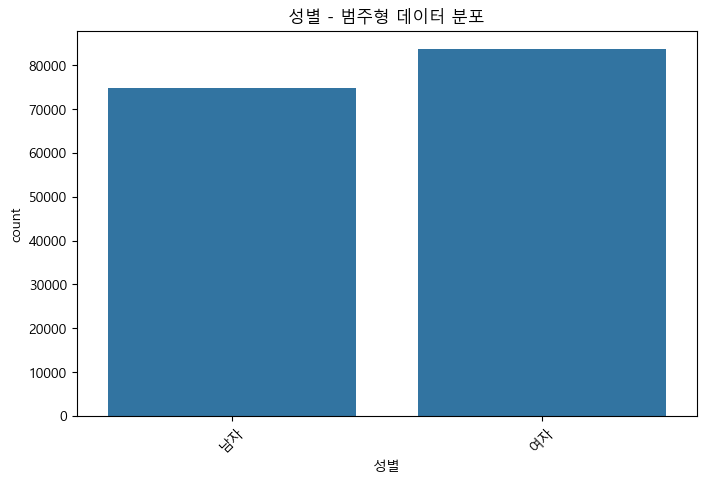

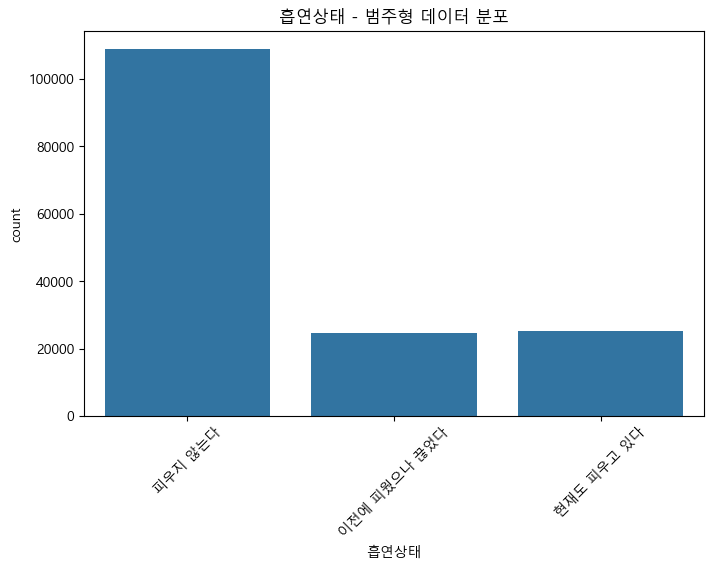

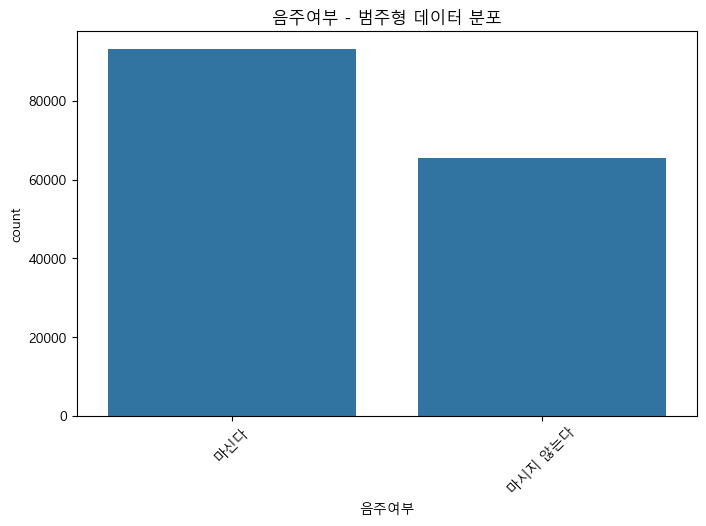

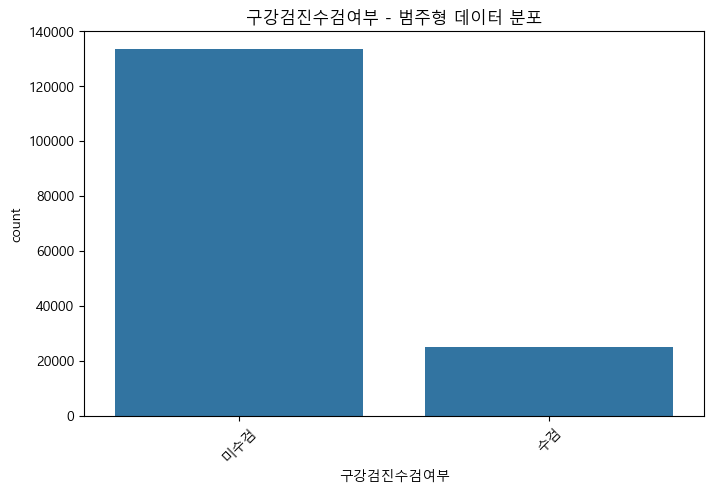

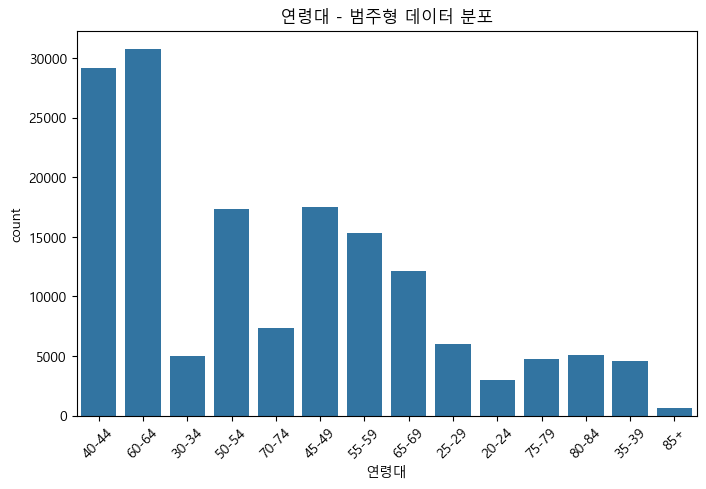

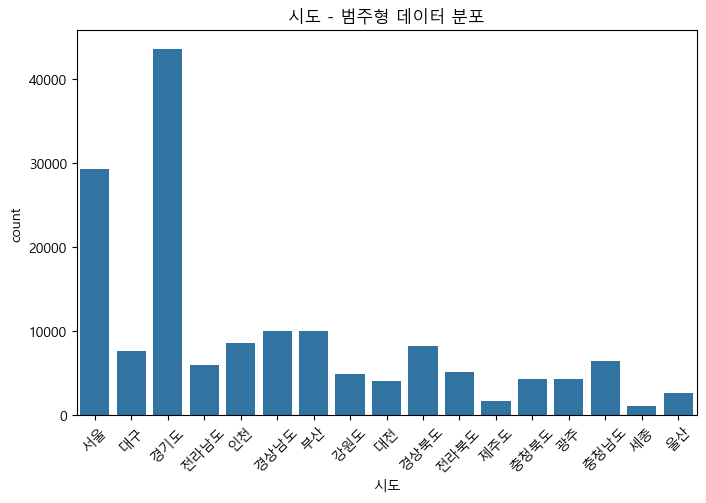

In [41]:
#범주형 데이터

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column])
    plt.title(f'{column} - 범주형 데이터 분포')
    plt.xticks(rotation=45)
    plt.show()

### 속성 간의 관계 살펴보기

#### 문제12 : 상관관계 분석하기
- 수치형 데이터 간의 상관 관계를 계산하고 히트맵을 사용해 시각화해보세요.

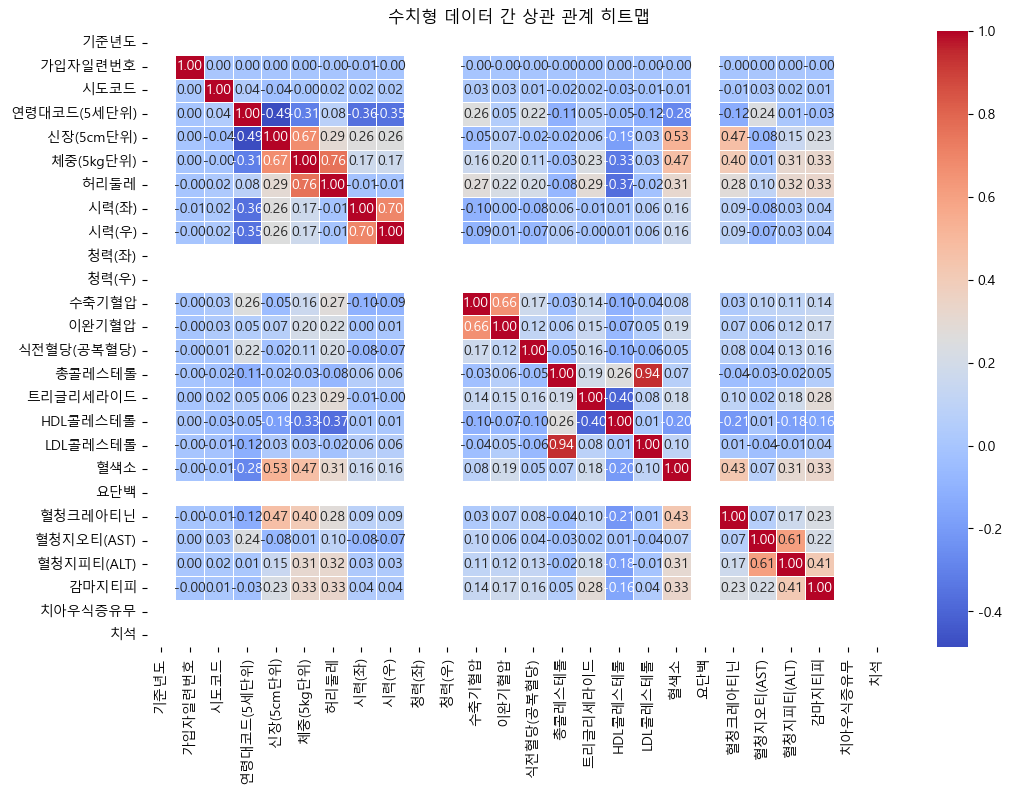

In [42]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('수치형 데이터 간 상관 관계 히트맵')
plt.show()

In [43]:
# 위 시각화에서 찾을 수 있는 관계성은 어떤 것이 있나요?
# 허리둘레와 체중 사이엔 양의 상관관계가 존재한다. 혈청 지오티와 지피티 사이에도 양의 상관관계가 존재한다. 총 콜레스테롤과 LDL콜레스테롤 사이에도 양의 상관관계가 존재한다. 신장과 체중에도 양의 상관관계가 존재
# HDL콜레스테롤과 트리글리세라이드,허리둘레 사이에 음의 상관관계가 존재한다. 신장과 연령대사이에도 음의 상관관계가 존재한다.

#### 문제13 : 수치형 변수들 간의 산점도 및 각 변수의 히스토그램을 그려 보세요

- 4가지 변수('신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압')에 대한 시각화를 진행해보세요.

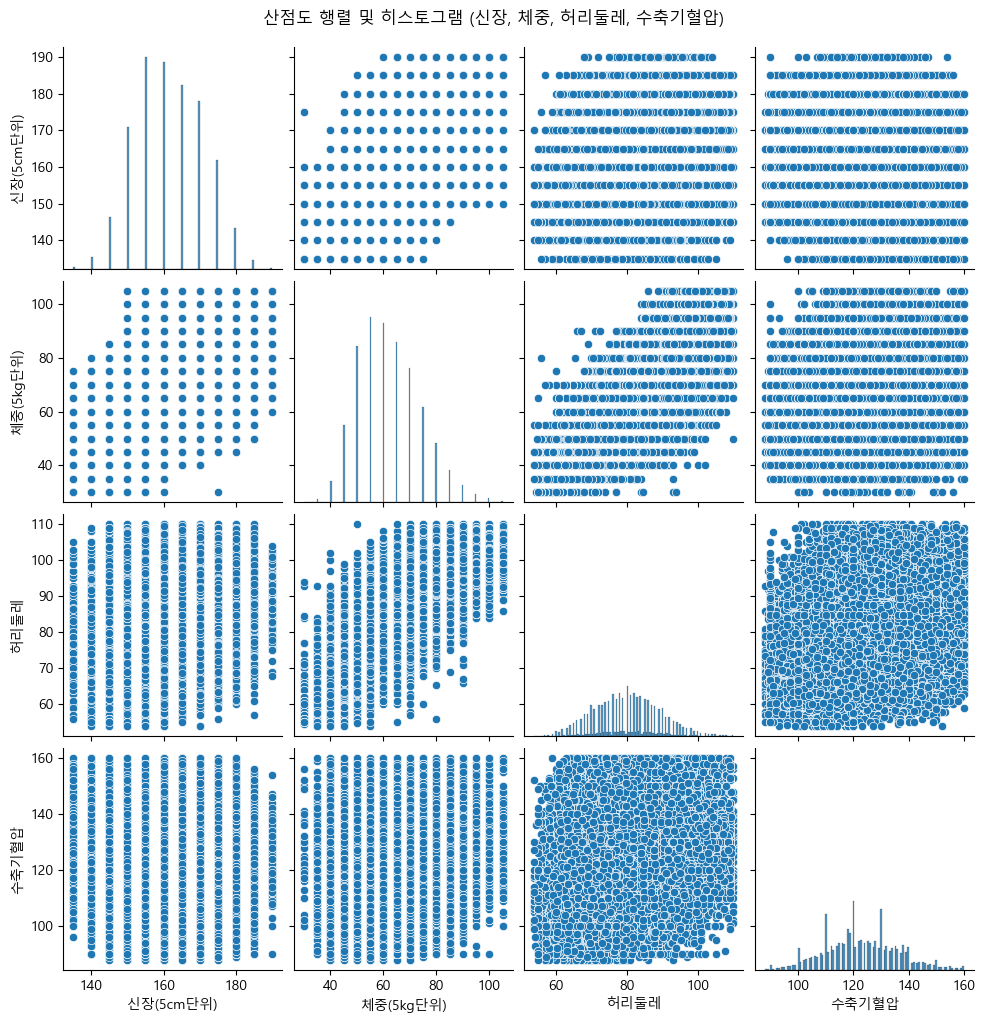

In [44]:
# 시각화 대상 변수 리스트
columns = ['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']

# Seaborn을 사용한 Pair Plot (산점도 행렬과 히스토그램)
sns.pairplot(df[columns], diag_kind='hist')
plt.suptitle('산점도 행렬 및 히스토그램 (신장, 체중, 허리둘레, 수축기혈압)', y=1.02)
plt.show()

#### 문제14 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 기술 통계 비교하기

- 범주형 변수에 따른 수치형 변수의 분포 분석해봅시다. 성별이 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)에 어떻게 영향을 미치는지 파악하고 싶습니다.

- 카테고리별 수치형 변수의 기술 통계 분석: 각 카테고리별로 수치형 변수의 평균, 중앙값, 분산 등을 비교합니다.

In [45]:
variables = ['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압']

gender_stats = df.groupby('성별')[variables].describe()

print(gender_stats)

   신장(5cm단위)                                                           \
       count        mean       std    min    25%    50%    75%    max   
성별                                                                      
남자   74859.0  168.907079  6.720090  135.0  165.0  170.0  175.0  190.0   
여자   83689.0  154.965706  6.238412  135.0  150.0  155.0  160.0  185.0   

   체중(5kg단위)                                                          허리둘레  \
       count       mean        std   min   25%   50%   75%    max    count   
성별                                                                           
남자   74859.0  69.421646  10.595235  30.0  60.0  70.0  75.0  105.0  74859.0   
여자   83689.0  55.635328   8.898653  30.0  50.0  55.0  60.0  105.0  83689.0   

                                                          수축기혈압              \
         mean       std   min   25%   50%   75%    max    count        mean   
성별                                                                            
남자  84

#### 문제15 : 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 비교하기

- 성별에 따른 몇 가지 주요 수치형 변수(신장, 체중, 허리둘레, 수축기혈압)의 분포를 시각화하여 비교해보세요.
- 시각화 방법은 자유롭게 선택하셔도 됩니다.

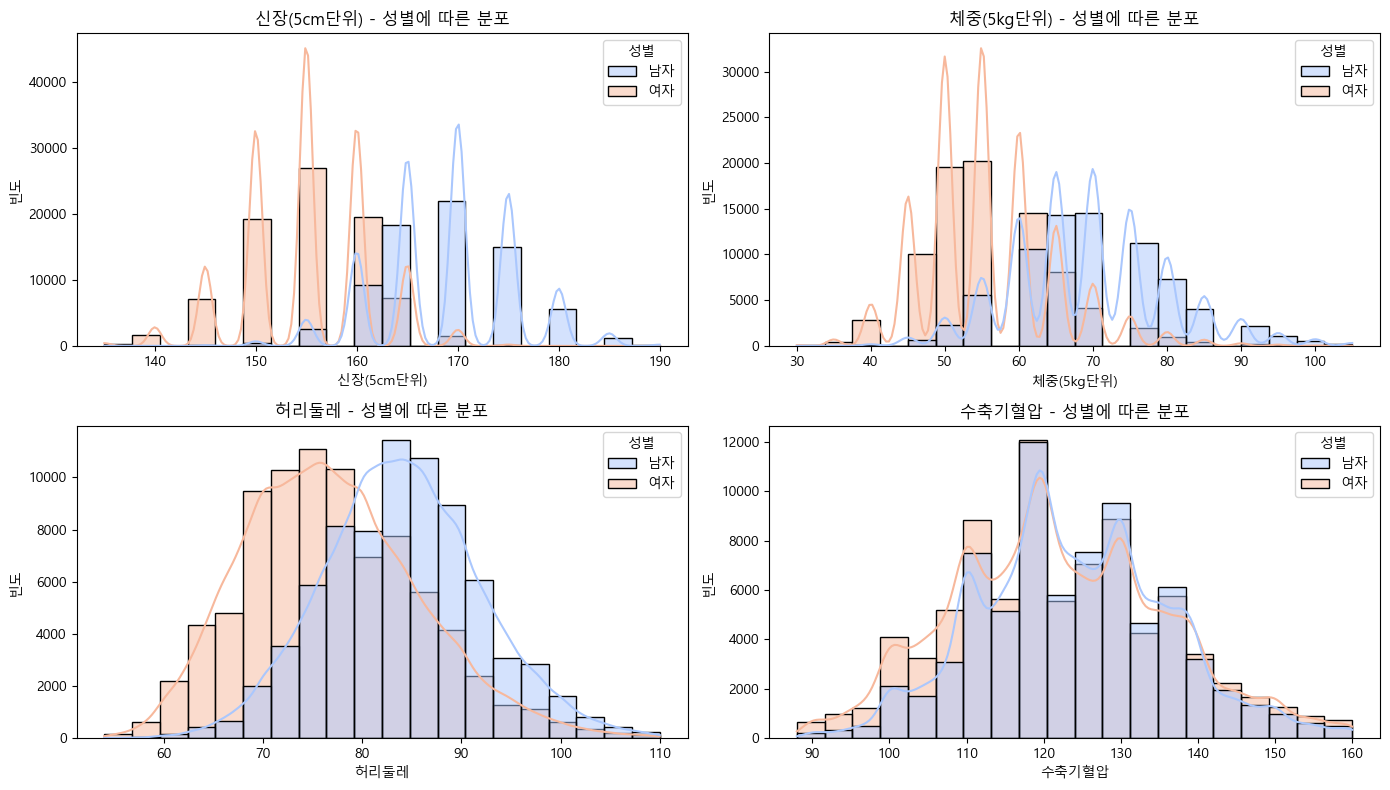

In [46]:
plt.figure(figsize=(14, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df, x=var, hue='성별', kde=True, bins=20, palette='coolwarm')
    plt.title(f'{var} - 성별에 따른 분포')
    plt.xlabel(var)
    plt.ylabel('빈도')

plt.tight_layout()
plt.show()

In [47]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제16 : 성별에 따른 흡연상태의 비율을 시각화해보세요

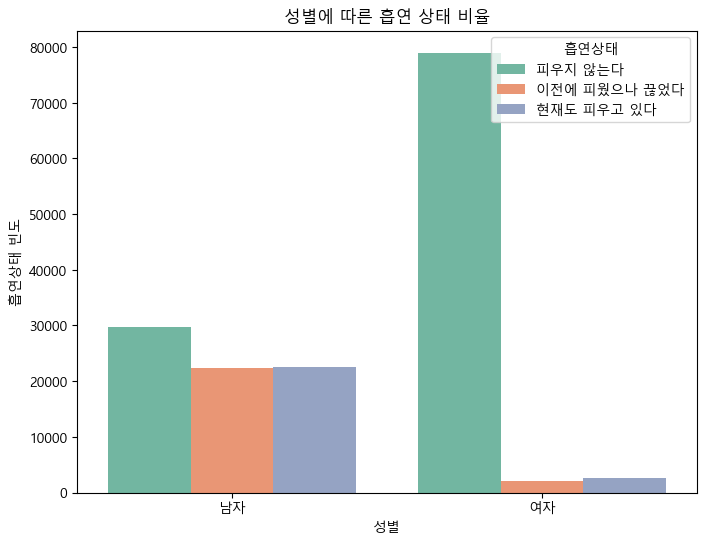

In [48]:
plt.figure(figsize=(8, 6))

sns.countplot(x='성별', hue='흡연상태', data=df, palette='Set2')

plt.title('성별에 따른 흡연 상태 비율')
plt.xlabel('성별')
plt.ylabel('흡연상태 빈도')
plt.legend(title='흡연상태', loc='upper right')

plt.show()

In [49]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
# 여성의 비흡연 비율이 압도적으로 높음을 알 수 있다.
# 남성은 흡연분포가 고르게 분포되어 있다.

#### 문제17 : 연령대별로 주요 건강 지표(신장, 체중, 허리둘레, 수축기혈압)를 분석해보세요.
- 연령대별로 이러한 지표들의 평균 값을 계산하여 피봇테이블을 생성하세요.

In [50]:
pivot_table = df.pivot_table(
    index='연령대',              
    values=['신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압'],  
    aggfunc='mean'            
)

print(pivot_table)

            수축기혈압   신장(5cm단위)  체중(5kg단위)       허리둘레
연령대                                                
20-24  119.748641  171.835938  70.427989  80.411719
25-29  120.574315  172.105878  71.845357  81.849315
30-34  120.748459  172.391131  73.283953  83.384470
35-39  121.354500  172.465513  73.373111  84.084410
40-44  118.162250  164.121645  63.291687  78.211684
45-49  119.978749  162.523199  62.168920  78.294507
50-54  121.009641  161.427458  61.396859  78.803764
55-59  122.583648  160.056352  60.676873  79.641134
60-64  124.823946  158.582339  59.921024  80.606542
65-69  127.467910  157.160408  59.505711  82.219624
70-74  129.445351  155.924415  58.609978  82.879459
75-79  130.856993  155.198446  57.755145  83.332234
80-84  131.470867  153.297452  55.454276  83.298005
85+    130.424765  150.775862  51.434169  81.573197


In [51]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?
# 연령이 증가함에 따라 허리둘레와 수축기 혈압이 증가함을 알 수 있다.
# 반대로 연령이 증가함에 따라 신장은 감소함을 알 수 있다.

#### 문제18 : 각 지표별로 연령대에 따른 평균값의 변화 추이를 그래프로 시각화해보세요.

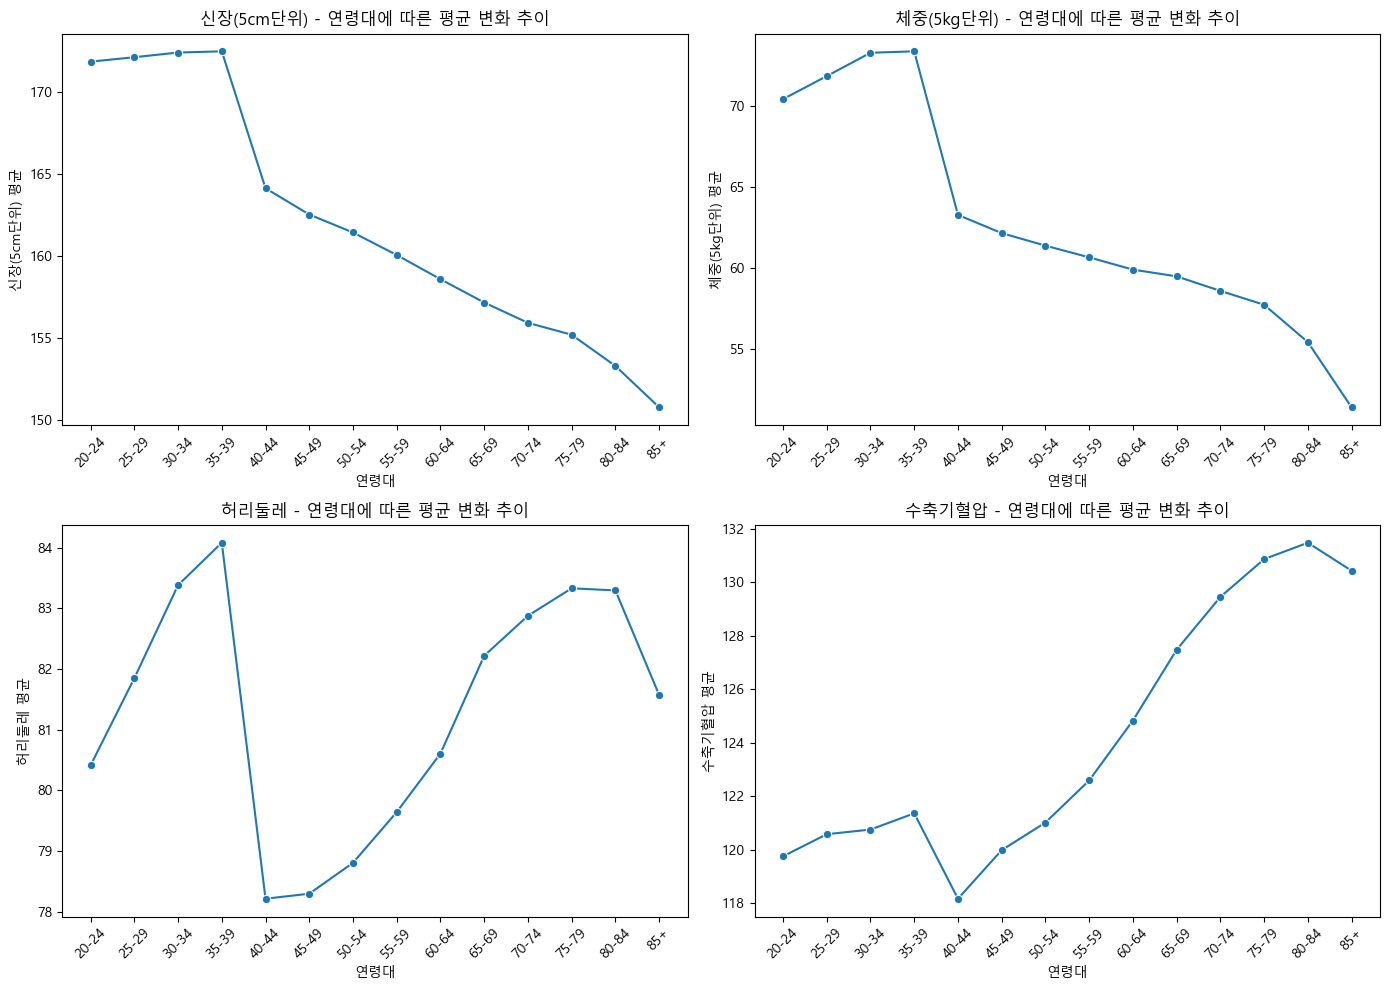

In [52]:
plt.figure(figsize=(14, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=pivot_table, x=pivot_table.index, y=var, marker='o')
    plt.title(f'{var} - 연령대에 따른 평균 변화 추이')
    plt.xlabel('연령대')
    plt.ylabel(f'{var} 평균')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 문제19 : BMI를 계산하고, 각 범주별로 분류해부세요.

체질량 지수(BMI)는 개인의 체중(kg)을 신장(m)의 제곱으로 나눈 값으로 계산하며, 비만도를 판단하는 데 널리 사용됩니다. BMI를 계산하여 각 개인의 비만도를 분류해보세요.


$$BMI= \frac{체중(kg)}{신장(m)^2}$$

BMI에 따른 비만도 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상 체중: 18.5 ≤ BMI < 25
- 과체중: 25 ≤ BMI < 30
- 비만: BMI ≥ 30

세계보건기구(WHO)의 BMI 분류는 다음과 같습니다:

- 저체중: BMI < 18.5
- 정상: 18.5 ≤ BMI < 24.9
- 과체중: 24.9 ≤ BMI < 30
- 비만: BMI ≥ 30

In [53]:
df['신장(m)'] = df['신장(5cm단위)'] * 0.05
df['BMI'] = df['체중(5kg단위)'] / (df['신장(m)'] ** 2)  

def categorize_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 25:
        return '정상 체중'
    elif 25 <= bmi < 30:
        return '과체중'
    else:
        return '비만'

df['BMI 범주'] = df['BMI'].apply(categorize_bmi)

print(df[['체중(5kg단위)', '신장(5cm단위)', 'BMI', 'BMI 범주']].head(3))

   체중(5kg단위)  신장(5cm단위)       BMI BMI 범주
1         70        175  0.914286    저체중
4         60        165  0.881543    저체중
5         70        175  0.914286    저체중


#### 문제20 : BMI 대한 기초 통계량을 확인해보세요.

In [54]:
# BMI에 관한 기초 통계량 계산
bmi_statistics = df['BMI'].describe()
print(bmi_statistics)

count    158548.000000
mean          0.948105
std           0.135365
min           0.391837
25%           0.859375
50%           0.937500
75%           1.028466
max           1.866667
Name: BMI, dtype: float64


#### 문제21 : BMI에 대한 분포를 더 자세히 살펴보기 위해 히스토그램과 박스 플롯을 사용해 시각화해보세요.

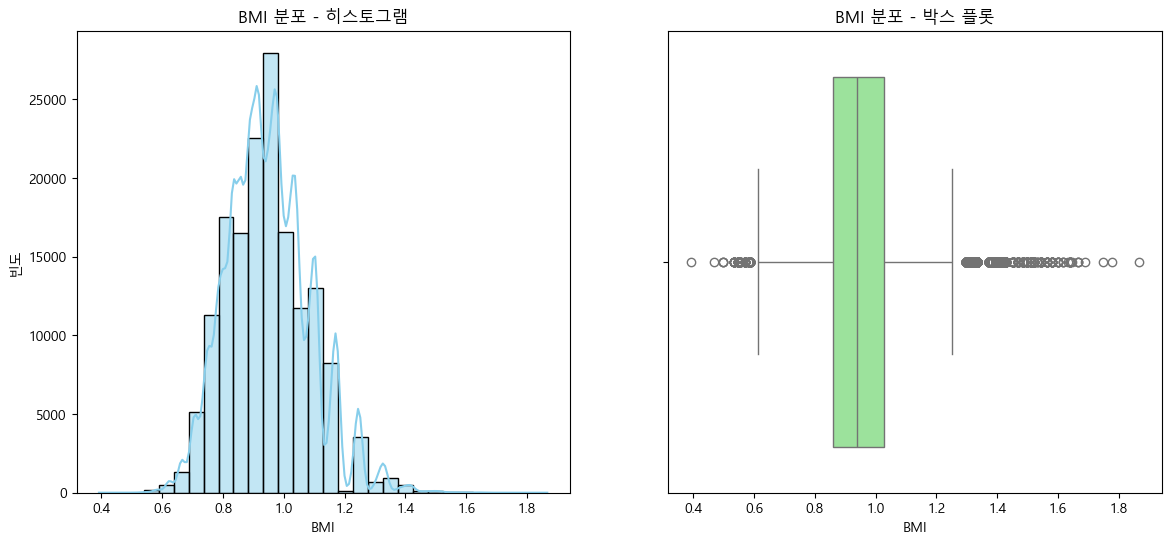

In [55]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], bins=30, kde=True, color='skyblue')
plt.title('BMI 분포 - 히스토그램')
plt.xlabel('BMI')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['BMI'], color='lightgreen')
plt.title('BMI 분포 - 박스 플롯')
plt.xlabel('BMI')

plt.show()

In [56]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


#### 문제22 : BMI 범주별 분포를 분석해보세요.
- 위에서 분류한 각 범주별로 인구 분포를 확인해보세요.

BMI 범주별 인구 분포 (수):
BMI 범주
정상 체중    97244
과체중      48139
저체중       7109
비만        6056
Name: count, dtype: int64


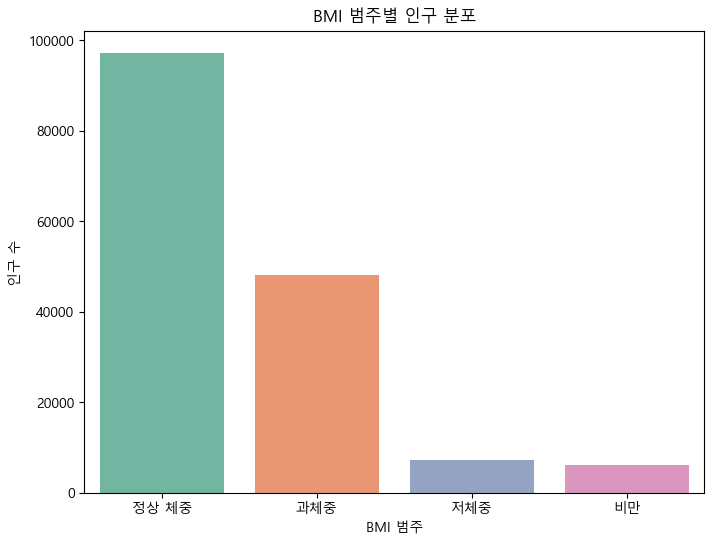

In [57]:
df['BMI'] = df['체중(5kg단위)'] / ((df['신장(5cm단위)'] / 100) ** 2)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 24.9:
        return '정상 체중'
    elif 24.9 <= bmi < 30:
        return '과체중'
    else:
        return '비만'

df['BMI 범주'] = df['BMI'].apply(categorize_bmi)

bmi_category_counts = df['BMI 범주'].value_counts()

plt.figure(figsize=(8, 6))

sns.countplot(x='BMI 범주', data=df, palette='Set2')
plt.title('BMI 범주별 인구 분포')
plt.xlabel('BMI 범주')
plt.ylabel('인구 수')

print("BMI 범주별 인구 분포 (수):")
print(bmi_category_counts)

plt.show()

In [58]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?
# 정상 체중의 비율이 과체중, 저체중, 비만보다 높다

#### 문제23 : 비만도(BMI 범주)와 다른 건강 지표(수축기혈압, 이완기혈압, 식전혈당) 간의 관계를 살펴보세요
- 기술 통계와 시각화를 모두 진행해주세요.

In [59]:
health_columns = ['수축기혈압', '이완기혈압', '식전혈당(공복혈당)']
bmi_stats = df.groupby('BMI 범주')[health_columns].describe()

print(bmi_stats)

          수축기혈압                                                           \
          count        mean        std   min    25%    50%    75%    max   
BMI 범주                                                                     
과체중     48139.0  126.083300  12.468640  88.0  118.0  126.0  135.0  160.0   
비만       6056.0  129.532860  12.099747  90.0  120.0  130.0  138.0  160.0   
저체중      7109.0  116.101983  13.289179  88.0  107.0  115.0  124.0  160.0   
정상 체중   97244.0  121.215849  13.160166  88.0  112.0  120.0  130.0  160.0   

          이완기혈압                                                      \
          count       mean       std   min   25%   50%   75%    max   
BMI 범주                                                                
과체중     48139.0  77.049565  8.876554  52.0  70.0  78.0  83.0  100.0   
비만       6056.0  79.294419  8.826524  52.0  73.0  80.0  85.0  100.0   
저체중      7109.0  71.806021  9.015240  52.0  65.0  71.0  78.0  100.0   
정상 체중   97244.0  74.197205  9.053056  52.

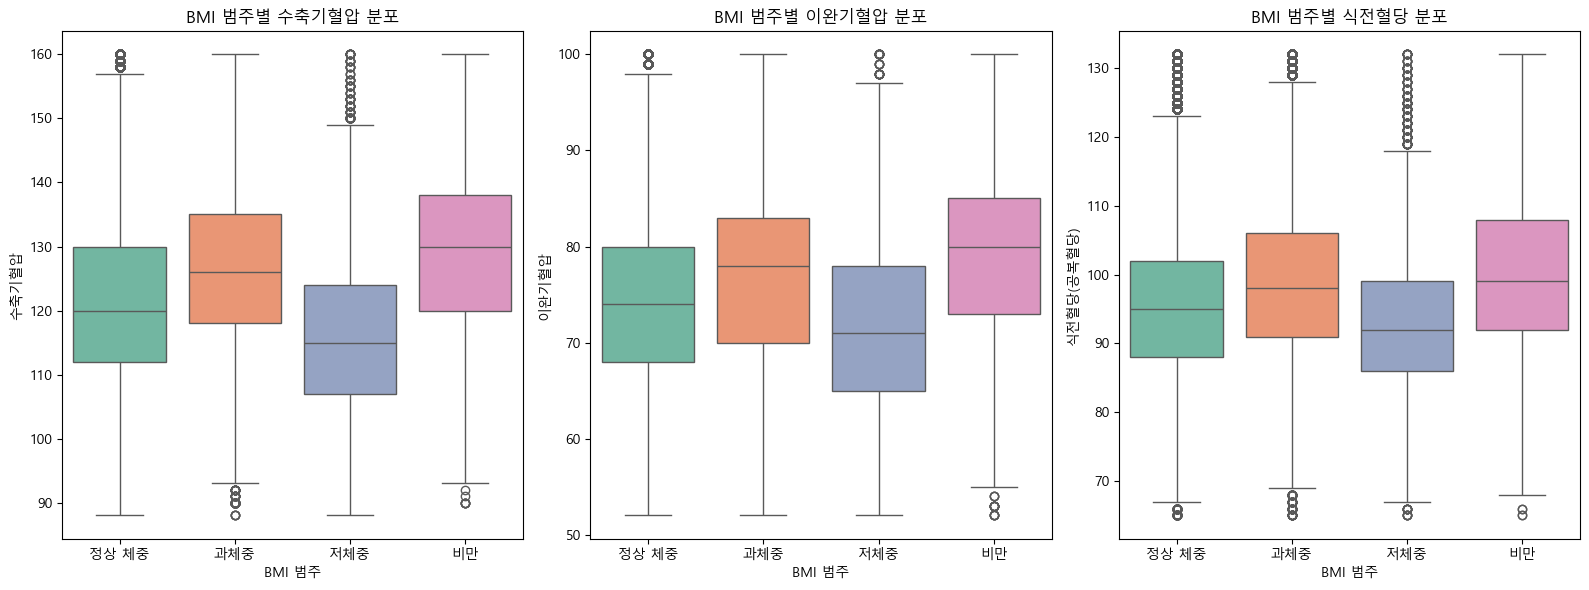

In [60]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='BMI 범주', y='수축기혈압', data=df, palette='Set2')
plt.title('BMI 범주별 수축기혈압 분포')

plt.subplot(1, 3, 2)
sns.boxplot(x='BMI 범주', y='이완기혈압', data=df, palette='Set2')
plt.title('BMI 범주별 이완기혈압 분포')

plt.subplot(1, 3, 3)
sns.boxplot(x='BMI 범주', y='식전혈당(공복혈당)', data=df, palette='Set2')
plt.title('BMI 범주별 식전혈당 분포')

plt.tight_layout()
plt.show()

In [61]:
# 위 데이터에서 어떤 인사이트를 확인할 수 있나요?
# 체중이 높을수록 혈압과 혈당이 높다.

#### 문제24 : 연령대 및 성별에 따른 BMI 변화를 분석해보세요.
- 연령대가 증가함에 따라 BMI가 어떻게 변화하는지, 그리고 남성과 여성 간의 차이가 있는지를 파악해보세요.
- 데이터를 성별과 연령대 코드로 그룹화하여 각 그룹의 평균 BMI를 계산하고 시각화해보세요.  

In [62]:
bmi_by_gender_age = df.groupby(['연령대', '성별'])['BMI'].mean().reset_index()
print(bmi_by_gender_age)

      연령대  성별        BMI
0   20-24  남자  23.824235
1   25-29  남자  24.221390
2   30-34  남자  24.627913
3   35-39  남자  24.638874
4   40-44  남자  24.587254
5   40-44  여자  22.518713
6   45-49  남자  24.477878
7   45-49  여자  22.744210
8   50-54  남자  24.446277
9   50-54  여자  22.800871
10  55-59  남자  24.240531
11  55-59  여자  23.174632
12  60-64  남자  24.166457
13  60-64  여자  23.488576
14  65-69  남자  24.109516
15  65-69  여자  23.995025
16  70-74  남자  23.949939
17  70-74  여자  24.134682
18  75-79  남자  23.755483
19  75-79  여자  24.060574
20  80-84  남자  23.162604
21  80-84  여자  23.820165
22    85+  남자  22.695215
23    85+  여자  22.462954


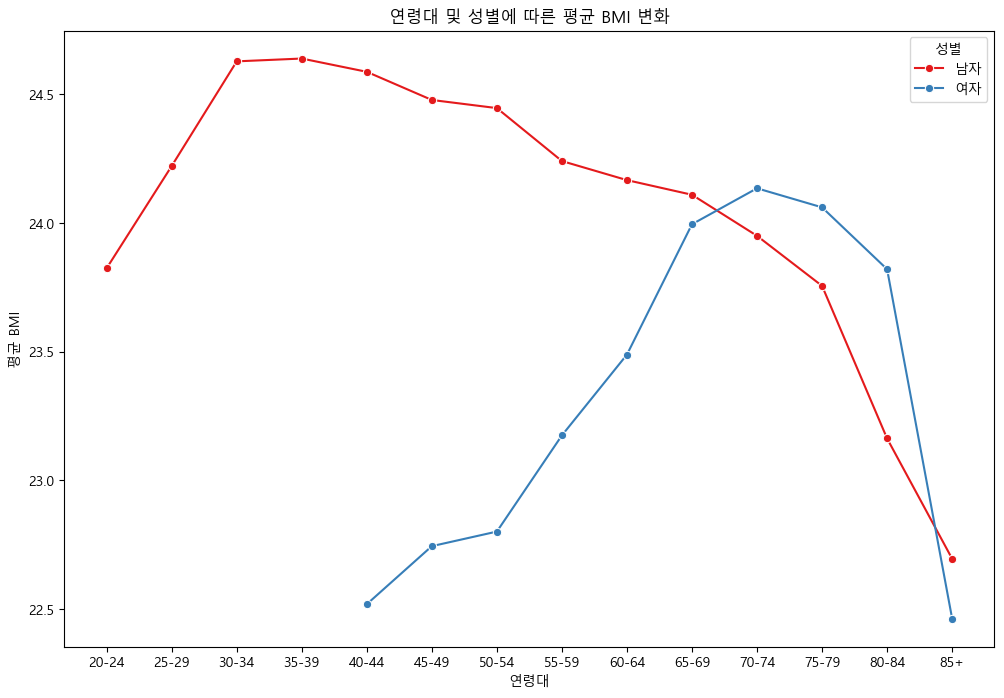

In [63]:
plt.figure(figsize=(12, 8))

sns.lineplot(x='연령대', y='BMI', hue='성별', data=bmi_by_gender_age, marker='o', palette='Set1')

plt.title('연령대 및 성별에 따른 평균 BMI 변화')
plt.xlabel('연령대')
plt.ylabel('평균 BMI')
plt.legend(title='성별')

plt.show()

In [64]:
# 위 시각화에서 어떤 인사이트를 확인할 수 있나요?


## 마무리

다양한 통계 및 시각화 분석을 진행하였습니다. 모두들 수고하셨습니다.    
제공된 문제 이외에도 다양한 분석을 진행할 수 있습니다. 마음껏 도전해보세요!